# Problem Research

tujuan dari final exam ini adalah untuk mengambil beberapa insight penting dari raw data yang telah disediakan guna keberlangsungan bisnis perushaan : 
untuk mengetahui data para debitur yang pasti mampu melunasi pinjaman agar tidak terdapat kredit macet dan sejenisnya agar perusahaan tidak rugi

# Data Pre-Processing

### application_train

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing

In [23]:
def abs_if_negative(x):
    if x < 0:
        return abs(x)
    else:
        return x

In [24]:
da = pd.read_csv ('application_train.csv')

In [25]:
da = da.drop(columns=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','OWN_CAR_AGE'])

In [26]:
da['OCCUPATION_TYPE1']= da['OCCUPATION_TYPE'].fillna('kosong') 
da.loc[da['OCCUPATION_TYPE'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,OCCUPATION_TYPE1
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,2,WEDNESDAY,14,XNA,1.0,0.0,1.0,0.0,0.0,kosong
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,2,FRIDAY,7,XNA,0.0,0.0,0.0,0.0,-2396.0,kosong
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,3,FRIDAY,12,XNA,0.0,0.0,0.0,0.0,-795.0,kosong
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,...,1,WEDNESDAY,11,Military,0.0,0.0,0.0,0.0,-849.0,kosong
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,...,2,WEDNESDAY,13,Business Entity Type 3,0.0,0.0,0.0,0.0,-1634.0,kosong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,...,1,SATURDAY,17,Business Entity Type 2,0.0,0.0,0.0,0.0,0.0,kosong
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,2,WEDNESDAY,10,XNA,0.0,0.0,0.0,0.0,-846.0,kosong
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,...,2,FRIDAY,10,Business Entity Type 3,0.0,0.0,0.0,0.0,-1459.0,kosong
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,2,MONDAY,15,XNA,0.0,0.0,0.0,0.0,0.0,kosong


In [27]:
da = da.drop(columns=['OCCUPATION_TYPE'])

In [28]:
da.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT        

In [29]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [30]:
da.dropna(inplace=True)

In [31]:
da.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

In [32]:
from datetime import datetime as dt
da["DAYS_BIRTH"]=pd.to_datetime(da["DAYS_BIRTH"])
da["DAYS_EMPLOYED"]=pd.to_datetime(da["DAYS_EMPLOYED"])
da["DAYS_REGISTRATION"]=pd.to_datetime(da["DAYS_REGISTRATION"])
da["DAYS_ID_PUBLISH"]=pd.to_datetime(da["DAYS_ID_PUBLISH"])
da["DAYS_LAST_PHONE_CHANGE"]=pd.to_datetime(da["DAYS_LAST_PHONE_CHANGE"])

da.sample(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,OCCUPATION_TYPE1
193108,323934,0,Cash loans,F,N,Y,0,58500.0,148365.0,10678.5,...,2,MONDAY,13,XNA,1.0,0.0,1.0,0.0,1970-01-01 00:00:00.000000000,kosong
120193,239377,0,Revolving loans,F,N,Y,1,225000.0,270000.0,13500.0,...,1,MONDAY,15,Construction,0.0,0.0,0.0,0.0,1969-12-31 23:59:59.999999517,Sales staff


### bureau

In [33]:
db = pd.read_csv ('bureau.csv')

In [34]:
db.isna().mean()*100

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473490
dtype: float64

In [35]:
db = db.drop(columns=['DAYS_ENDDATE_FACT','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM_LIMIT','AMT_ANNUITY'])

In [36]:
print('The mean of "DAYS_CREDIT_ENDDATE" is %.2f' %(db["DAYS_CREDIT_ENDDATE"].mean(skipna=True)))
print('The median of "DAYS_CREDIT_ENDDATE" is %.2f' %(db["DAYS_CREDIT_ENDDATE"].median(skipna=True)))

The mean of "DAYS_CREDIT_ENDDATE" is 510.52
The median of "DAYS_CREDIT_ENDDATE" is -330.00


In [37]:
print('The mean of "AMT_CREDIT_SUM_DEBT" is %.2f' %(db["AMT_CREDIT_SUM_DEBT"].mean(skipna=True)))
print('The median of "AMT_CREDIT_SUM_DEBT" is %.2f' %(db["AMT_CREDIT_SUM_DEBT"].median(skipna=True)))

The mean of "AMT_CREDIT_SUM_DEBT" is 137085.12
The median of "AMT_CREDIT_SUM_DEBT" is 0.00


In [38]:
db["AMT_CREDIT_SUM_DEBT"].fillna(db["AMT_CREDIT_SUM_DEBT"].median(skipna=True), inplace=True)

db["DAYS_CREDIT_ENDDATE"].fillna(db["DAYS_CREDIT_ENDDATE"].median(skipna=True), inplace=True)

db["AMT_CREDIT_SUM"].fillna(db["AMT_CREDIT_SUM"].median(skipna=True), inplace=True)

In [39]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   CNT_CREDIT_PROLONG      int64  
 8   AMT_CREDIT_SUM          float64
 9   AMT_CREDIT_SUM_DEBT     float64
 10  AMT_CREDIT_SUM_OVERDUE  float64
 11  CREDIT_TYPE             object 
 12  DAYS_CREDIT_UPDATE      int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 170.2+ MB


In [40]:
db.isna().mean()*100

SK_ID_CURR                0.0
SK_ID_BUREAU              0.0
CREDIT_ACTIVE             0.0
CREDIT_CURRENCY           0.0
DAYS_CREDIT               0.0
CREDIT_DAY_OVERDUE        0.0
DAYS_CREDIT_ENDDATE       0.0
CNT_CREDIT_PROLONG        0.0
AMT_CREDIT_SUM            0.0
AMT_CREDIT_SUM_DEBT       0.0
AMT_CREDIT_SUM_OVERDUE    0.0
CREDIT_TYPE               0.0
DAYS_CREDIT_UPDATE        0.0
dtype: float64

### bureau_balance

In [41]:
dc = pd.read_csv ('bureau_balance.csv')

In [42]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [43]:
dc.isna().mean()*100

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

In [44]:
dc['MONTHS_BALANCE']=dc['MONTHS_BALANCE'].apply(abs_if_negative)

### previous_application

In [45]:
dd = pd.read_csv ('previous_application.csv')

In [46]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [47]:
dd.isna().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [48]:
dd = dd.drop(columns=['NFLAG_INSURED_ON_APPROVAL','DAYS_TERMINATION','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE','DAYS_FIRST_DRAWING','NAME_TYPE_SUITE','RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT'])

In [49]:
dd.dropna(inplace=True)

In [50]:
dd.isna().mean()*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

### POS_CASH_balance

In [51]:
de = pd.read_csv ('POS_CASH_balance.csv')

In [52]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [53]:
de.isna().mean()*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.260675
CNT_INSTALMENT_FUTURE    0.260835
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [54]:
de["CNT_INSTALMENT"].fillna(de["CNT_INSTALMENT"].median(skipna=True), inplace=True)

de["CNT_INSTALMENT_FUTURE"].fillna(de["CNT_INSTALMENT_FUTURE"].median(skipna=True), inplace=True)

In [55]:
de['MONTHS_BALANCE']=de['MONTHS_BALANCE'].apply(abs_if_negative)

In [56]:
for i in de.columns:
    print(i,"-------",de[i].unique())

SK_ID_PREV ------- [1803195 1715348 1784872 ... 2452932 1980876 2308284]
SK_ID_CURR ------- [182943 367990 397406 ... 394310 240059 144536]
MONTHS_BALANCE ------- [31 33 32 35 38 39 34 41 37 40 43 36 42 47 44 46 45 27 25 24 30 28 26 29
 48 15 19 22 14 18 16 21 17 20 23  1  6  2  3  5  4 13 11 10  9  7  8 54
 49 52 53 50 51 55 12 94 95 92 91 96 93 57 64 56 59 60 66 65 58 63 62 61
 87 86 88 89 90 72 74 73 82 78 81 75 77 80 76 79 69 70 71 68 67 83 85 84]
CNT_INSTALMENT ------- [48. 36. 12. 24. 60. 18.  4. 42. 25. 14. 16. 13.  8. 10. 15. 11. 30. 54.
  6.  9.  5. 17.  3.  2. 20. 32.  1.  7. 47. 49. 28. 43. 23. 21. 19. 39.
 37. 35. 27. 22. 41. 31. 61. 26. 34. 29. 44. 55. 33. 66. 46. 59. 38. 72.
 40. 57. 45. 92. 56. 84. 51. 52. 58. 62. 53. 64. 50. 77. 70. 81. 63. 71.
 68.]
CNT_INSTALMENT_FUTURE ------- [45. 35.  9. 42. 12. 43. 36. 16. 24.  5. 15.  1. 28. 23. 56. 11.  7. 18.
 17. 46. 21.  0.  4. 40. 32. 19.  8. 10.  2. 13. 14.  3.  6. 48. 22. 34.
 47. 30. 29. 41. 54. 20. 37. 31. 27. 26. 25. 38

In [57]:
de.isna().mean()*100

SK_ID_PREV               0.0
SK_ID_CURR               0.0
MONTHS_BALANCE           0.0
CNT_INSTALMENT           0.0
CNT_INSTALMENT_FUTURE    0.0
NAME_CONTRACT_STATUS     0.0
SK_DPD                   0.0
SK_DPD_DEF               0.0
dtype: float64

### credit_card_balance

In [58]:
dg = pd.read_csv ('credit_card_balance.csv')

In [59]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [60]:
dg.isna().mean()*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
MONTHS_BALANCE                 0.000000
AMT_BALANCE                    0.000000
AMT_CREDIT_LIMIT_ACTUAL        0.000000
AMT_DRAWINGS_ATM_CURRENT      19.524872
AMT_DRAWINGS_CURRENT           0.000000
AMT_DRAWINGS_OTHER_CURRENT    19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
AMT_INST_MIN_REGULARITY        7.948208
AMT_PAYMENT_CURRENT           19.998063
AMT_PAYMENT_TOTAL_CURRENT      0.000000
AMT_RECEIVABLE_PRINCIPAL       0.000000
AMT_RECIVABLE                  0.000000
AMT_TOTAL_RECEIVABLE           0.000000
CNT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_CURRENT           0.000000
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_POS_CURRENT      19.524872
CNT_INSTALMENT_MATURE_CUM      7.948208
NAME_CONTRACT_STATUS           0.000000
SK_DPD                         0.000000
SK_DPD_DEF                     0.000000
dtype: float64

In [61]:
dg = dg.drop(columns=['AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT','CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_OTHER_CURRENT','CNT_DRAWINGS_POS_CURRENT'])

In [62]:
dg["AMT_INST_MIN_REGULARITY"].fillna(dg["AMT_INST_MIN_REGULARITY"].median(skipna=True), inplace=True)

dg["AMT_PAYMENT_CURRENT"].fillna(dg["AMT_PAYMENT_CURRENT"].median(skipna=True), inplace=True)

dg["CNT_INSTALMENT_MATURE_CUM"].fillna(dg["CNT_INSTALMENT_MATURE_CUM"].median(skipna=True), inplace=True)

In [63]:
dg['MONTHS_BALANCE']=dg['MONTHS_BALANCE'].apply(abs_if_negative)

In [64]:
dg.isna().mean()*100

SK_ID_PREV                   0.0
SK_ID_CURR                   0.0
MONTHS_BALANCE               0.0
AMT_BALANCE                  0.0
AMT_CREDIT_LIMIT_ACTUAL      0.0
AMT_DRAWINGS_CURRENT         0.0
AMT_INST_MIN_REGULARITY      0.0
AMT_PAYMENT_CURRENT          0.0
AMT_PAYMENT_TOTAL_CURRENT    0.0
AMT_RECEIVABLE_PRINCIPAL     0.0
AMT_RECIVABLE                0.0
AMT_TOTAL_RECEIVABLE         0.0
CNT_DRAWINGS_CURRENT         0.0
CNT_INSTALMENT_MATURE_CUM    0.0
NAME_CONTRACT_STATUS         0.0
SK_DPD                       0.0
SK_DPD_DEF                   0.0
dtype: float64

### installments_payments

In [65]:
df = pd.read_csv ('installments_payments.csv')

In [66]:
df["DAYS_ENTRY_PAYMENT"].fillna(df["DAYS_ENTRY_PAYMENT"].median(skipna=True), inplace=True)

df["AMT_PAYMENT"].fillna(df["AMT_PAYMENT"].median(skipna=True), inplace=True)

In [67]:
df.isna().mean()*100

SK_ID_PREV                0.0
SK_ID_CURR                0.0
NUM_INSTALMENT_VERSION    0.0
NUM_INSTALMENT_NUMBER     0.0
DAYS_INSTALMENT           0.0
DAYS_ENTRY_PAYMENT        0.0
AMT_INSTALMENT            0.0
AMT_PAYMENT               0.0
dtype: float64

# Data Visualization and Bussines Insight

## Aplication_train

In [10]:
da.sample(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,OCCUPATION_TYPE1
58127,167382,0,Cash loans,M,Y,N,2,135000.0,545040.0,26640.0,...,2,FRIDAY,12,Self-employed,1.0,0.0,1.0,0.0,1969-12-31 23:59:59.999998629,Laborers
72767,184382,0,Cash loans,F,N,Y,0,157500.0,229500.0,27364.5,...,2,WEDNESDAY,14,Kindergarten,1.0,0.0,1.0,0.0,1969-12-31 23:59:59.999996809,Core staff


Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


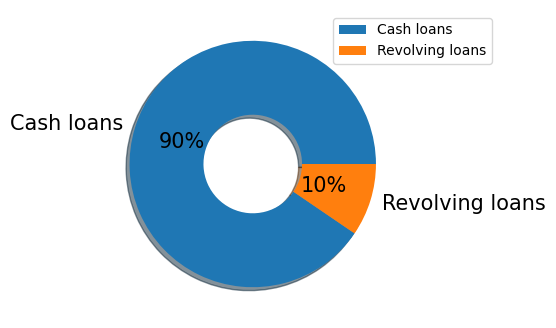

In [12]:
#banyaknya contrac tipe

l=['Cash loans','Revolving loans']
x=da["NAME_CONTRACT_TYPE"].value_counts()
print(x)
plt.figure(figsize=(4,4))
plt.pie(x,labels=l,shadow=True,autopct="%0.0f%%",textprops={'fontsize': 15},wedgeprops={"width":0.6})
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.9));

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


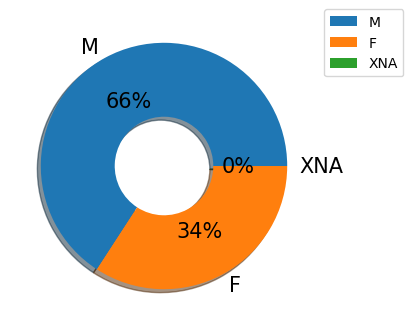

In [13]:
#banyaknya co dan ce

l=['M','F','XNA']
x=da["CODE_GENDER"].value_counts()
print(x)
plt.figure(figsize=(4,4))
plt.pie(x,labels=l,shadow=True,autopct="%0.0f%%",textprops={'fontsize': 15},wedgeprops={"width":0.6})
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.9));

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


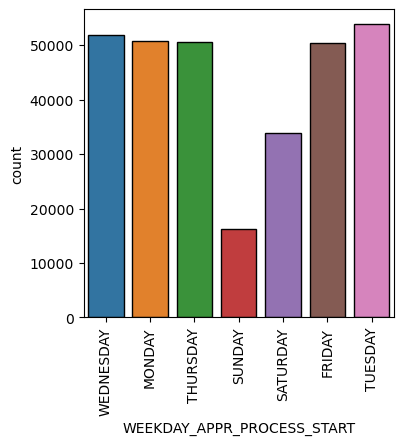

In [14]:
#hari nasabah apply pinjaman

print(da["WEEKDAY_APPR_PROCESS_START"].value_counts())
plt.figure(figsize=(4,4))
sns.countplot(x="WEEKDAY_APPR_PROCESS_START",data=da,edgecolor="black")
plt.xticks(rotation=90);

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


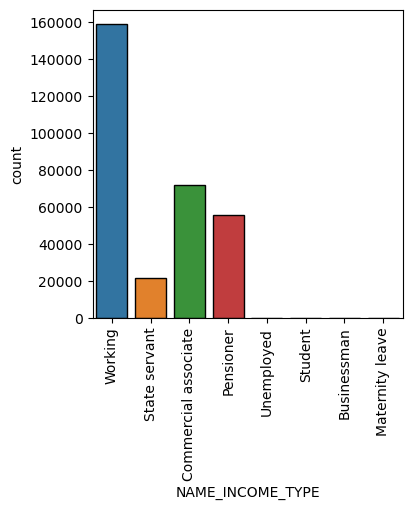

In [15]:
#status para nasabah

print(da["NAME_INCOME_TYPE"].value_counts())
plt.figure(figsize=(4,4))
sns.countplot(x="NAME_INCOME_TYPE",data=da,edgecolor="black")
plt.xticks(rotation=90);

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


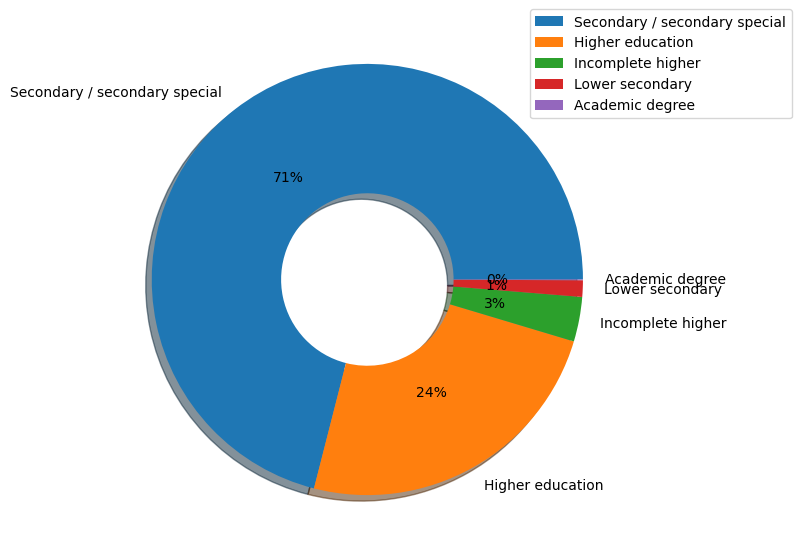

In [16]:
#latar belakang pendidikan

l=['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
x=da["NAME_EDUCATION_TYPE"].value_counts()
print(x)
plt.figure(figsize=(7,7))
plt.pie(x,labels=l,shadow=True,autopct="%0.0f%%",textprops={'fontsize': 10},wedgeprops={"width":0.6})
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.9));

In [17]:
# Top 10 organisasi dimana nasabah bekerja
da["ORGANIZATION_TYPE"].value_counts().head(10).to_frame()

,ORGANIZATION_TYPE
Business Entity Type 3,67992
XNA,55374
Self-employed,38412
Other,16683
Medicine,11193
Business Entity Type 2,10553
Government,10404
School,8893
Trade: type 7,7831
Kindergarten,6880


NAME_EDUCATION_TYPE
Academic degree                  3.936150e+07
Higher education                 1.562032e+10
Incomplete higher                1.865931e+09
Lower secondary                  4.963828e+08
Secondary / secondary special    3.388522e+10
Name: AMT_INCOME_TOTAL, dtype: float64


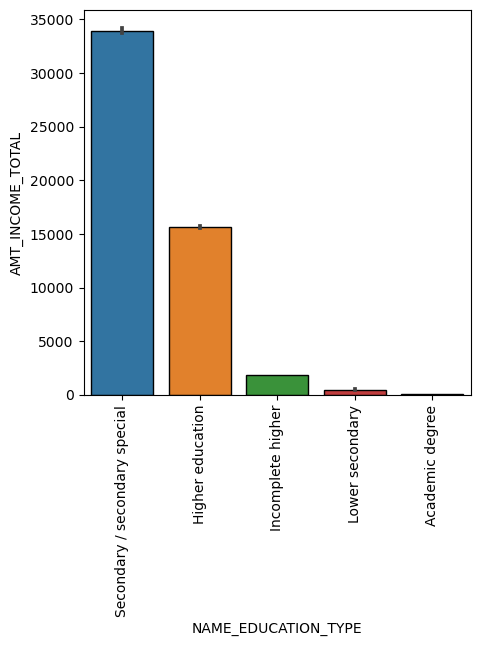

In [18]:
# perbandingan pendidikan dengan penghasilan total
print(da.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].sum())
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="NAME_EDUCATION_TYPE",y=da["AMT_INCOME_TOTAL"]/1000000,data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

NAME_EDUCATION_TYPE
Academic degree                    118656562.50
Higher education                 51651760995.00
Incomplete higher                 5824289956.50
Lower secondary                   1868880510.00
Secondary / secondary special   124743496171.50
Name: AMT_CREDIT, dtype: float64


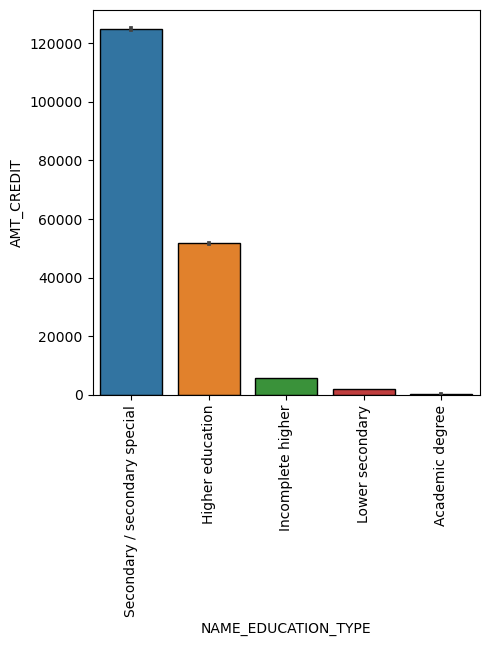

In [19]:
# perbandingan pendidikan dengan total credit 
print(da.groupby("NAME_EDUCATION_TYPE")["AMT_CREDIT"].sum())
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="NAME_EDUCATION_TYPE",y=da["AMT_CREDIT"]/1000000,data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

NAME_EDUCATION_TYPE
Academic degree                  5.328454e+06
Higher education                 2.290542e+09
Incomplete higher                2.794708e+08
Lower secondary                  8.648893e+07
Secondary / secondary special    5.646892e+09
Name: AMT_ANNUITY, dtype: float64


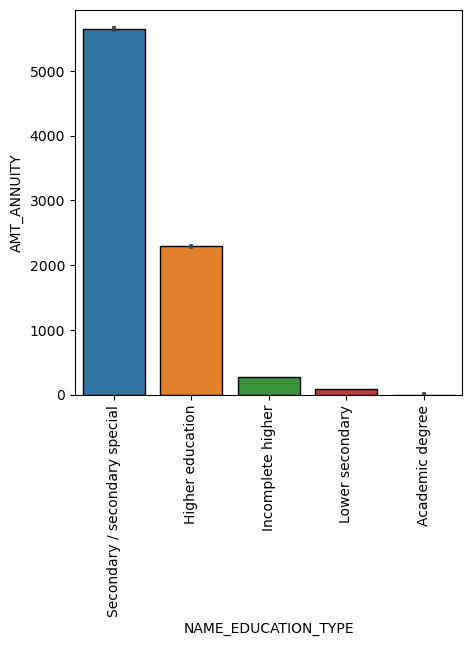

In [56]:
# perbandingan pendidikan dengan total biaya perbulan 
print(da.groupby("NAME_EDUCATION_TYPE")["AMT_ANNUITY"].sum())
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="NAME_EDUCATION_TYPE",y=da["AMT_ANNUITY"]/1000000,data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

REGION_RATING_CLIENT  NAME_HOUSING_TYPE  
1                     Co-op apartment          28014453.00
                      House / apartment      6653466310.50
                      Municipal apartment     678579997.50
                      Office apartment         65243146.50
                      Rented apartment         79123675.50
                      With parents            219654238.50
2                     Co-op apartment         139462330.50
                      House / apartment     32810217003.67
                      Municipal apartment     976901143.50
                      Office apartment        342520965.00
                      Rented apartment        586126116.00
                      With parents           1732430261.70
3                     Co-op apartment          19642500.00
                      House / apartment      6477888958.56
                      Municipal apartment     214947270.00
                      Office apartment         80346811.50
              

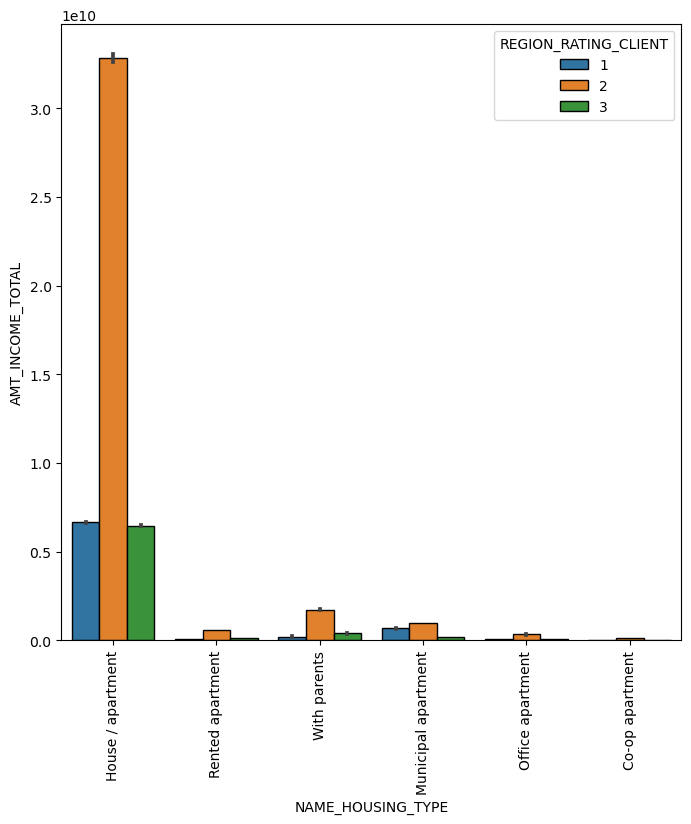

In [57]:
# perbandingan regional ranting dengan tipe rumah dan penghasilan total
print(da.groupby(["REGION_RATING_CLIENT","NAME_HOUSING_TYPE"])["AMT_INCOME_TOTAL"].sum())

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(8,8))
sns.barplot(x="NAME_HOUSING_TYPE",y="AMT_INCOME_TOTAL",hue="REGION_RATING_CLIENT",data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

REGION_RATING_CLIENT  NAME_HOUSING_TYPE  
1                     Co-op apartment           85868991.00
                      House / apartment      20872704775.50
                      Municipal apartment     2302120557.00
                      Office apartment         199059970.50
                      Rented apartment         213962670.00
                      With parents             642210268.50
2                     Co-op apartment          482367330.00
                      House / apartment     119070077206.50
                      Municipal apartment     3550136454.00
                      Office apartment        1153138221.00
                      Rented apartment        1864529140.50
                      With parents            5544435213.00
3                     Co-op apartment           80342860.50
                      House / apartment      24693187806.00
                      Municipal apartment      835643983.50
                      Office apartment         279357223.5

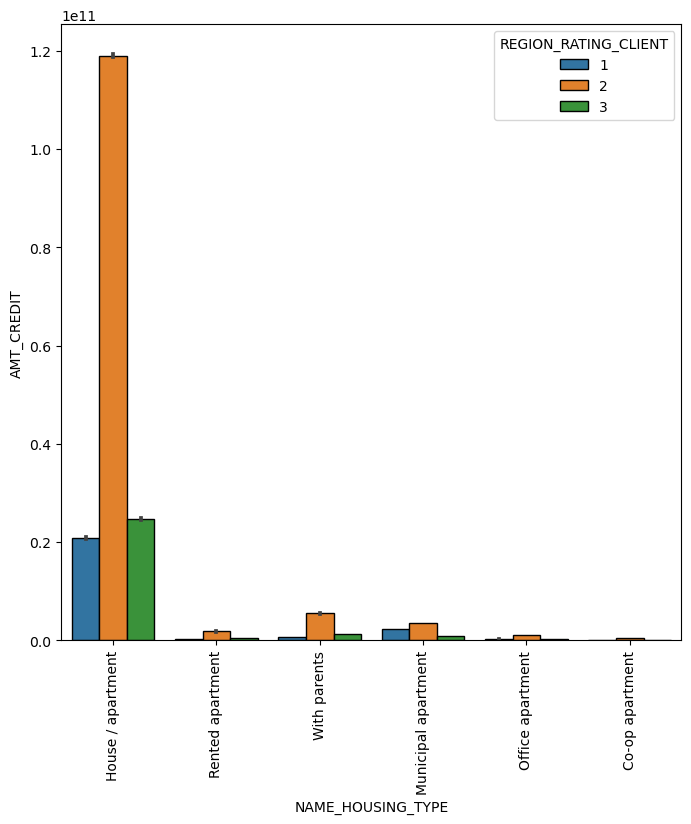

In [58]:
# perbandingan regional ranting dengan tipe rumah dan penghasilan total
print(da.groupby(["REGION_RATING_CLIENT","NAME_HOUSING_TYPE"])["AMT_CREDIT"].sum())

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(8,8))
sns.barplot(x="NAME_HOUSING_TYPE",y="AMT_CREDIT",hue="REGION_RATING_CLIENT",data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

REGION_RATING_CLIENT  NAME_HOUSING_TYPE  
1                     Co-op apartment          4094185.50
                      House / apartment      948750372.00
                      Municipal apartment    103561681.50
                      Office apartment         9004644.00
                      Rented apartment        10163241.00
                      With parents            30188223.00
2                     Co-op apartment         22516078.50
                      House / apartment     5347399599.00
                      Municipal apartment    159218856.00
                      Office apartment        52233853.50
                      Rented apartment        91861479.00
                      With parents           272760372.00
3                     Co-op apartment          3515490.00
                      House / apartment     1113092874.00
                      Municipal apartment     37816708.50
                      Office apartment        12841780.50
                      Rented a

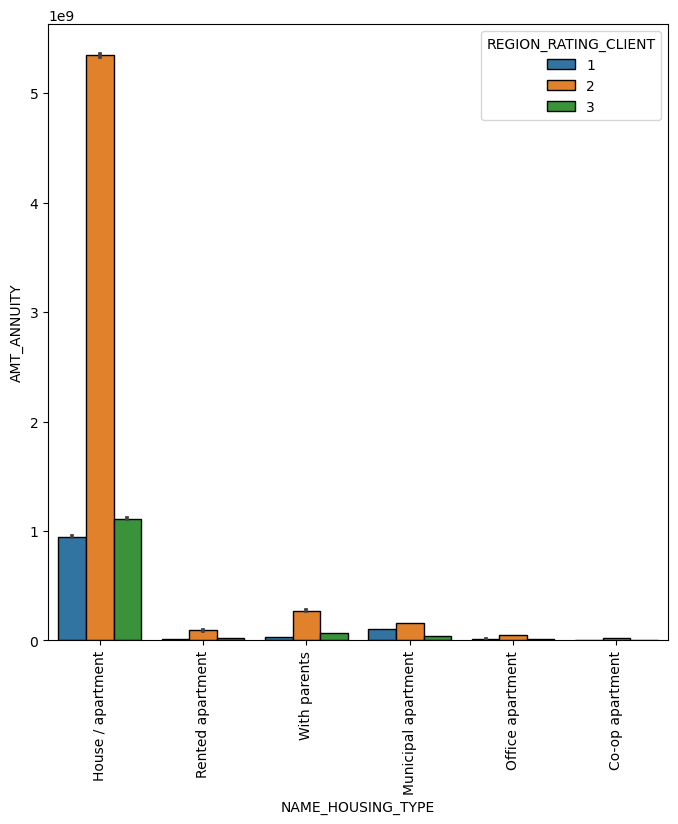

In [59]:
# perbandingan regional ranting dengan tipe rumah dan penghasilan total
print(da.groupby(["REGION_RATING_CLIENT","NAME_HOUSING_TYPE"])["AMT_ANNUITY"].sum())

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(8,8))
sns.barplot(x="NAME_HOUSING_TYPE",y="AMT_ANNUITY",hue="REGION_RATING_CLIENT",data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

CODE_GENDER  NAME_HOUSING_TYPE  
F            House / apartment     108313835647.50
M            House / apartment      56320919140.50
F            Municipal apartment     4585376142.00
             With parents            4070299536.00
M            With parents            3429118872.00
             Municipal apartment     2102142352.50
F            Rented apartment        1409857546.50
M            Rented apartment        1144776231.00
F            Office apartment         928420636.50
M            Office apartment         703134778.50
F            Co-op apartment          380399107.50
M            Co-op apartment          268180074.00
XNA          House / apartment          1215000.00
             Municipal apartment         382500.00
Name: AMT_CREDIT, dtype: float64


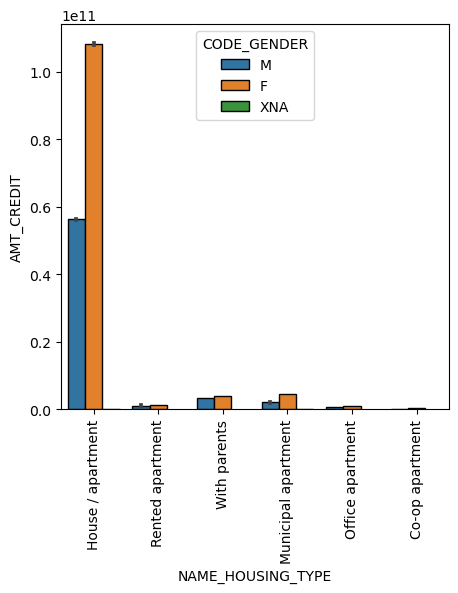

In [60]:
print(da.groupby(["CODE_GENDER","NAME_HOUSING_TYPE"])["AMT_CREDIT"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="NAME_HOUSING_TYPE",y="AMT_CREDIT",hue="CODE_GENDER",data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);
#nilai pengguna kredit tertinggi jatuh pada office apartement

CODE_GENDER  NAME_HOUSING_TYPE  
F            House / apartment     28310118888.74
M            House / apartment     17630913384.00
F            Municipal apartment    1220563246.50
M            With parents           1188313417.53
F            With parents           1157529704.67
M            Municipal apartment     649658164.50
F            Rented apartment        407004250.50
M            Rented apartment        404919553.50
F            Office apartment        246653734.50
M            Office apartment        241457188.50
F            Co-op apartment         102945240.00
M            Co-op apartment          84174043.50
XNA          House / apartment          540000.00
             Municipal apartment        207000.00
Name: AMT_INCOME_TOTAL, dtype: float64


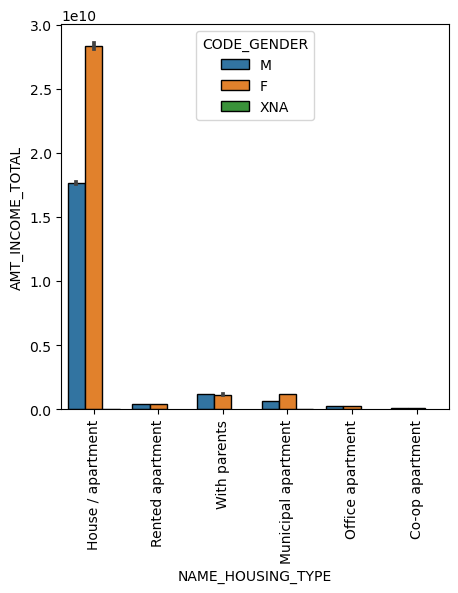

In [61]:
print(da.groupby(["CODE_GENDER","NAME_HOUSING_TYPE"])["AMT_INCOME_TOTAL"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="NAME_HOUSING_TYPE",y="AMT_INCOME_TOTAL",hue="CODE_GENDER",data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

ORGANIZATION_TYPE
Advertising                 87481350.00
Agriculture                350257603.50
Bank                       490881586.50
Business Entity Type 1    1106996193.00
Business Entity Type 2    1793659290.35
Business Entity Type 3   12848473505.92
Cleaning                    39660750.00
Construction              1337188207.50
Culture                     65742525.00
Electricity                163116792.00
Emergency                  102786745.50
Government                1668125208.29
Hotel                      152607132.00
Housing                    470422998.00
Industry: type 1           179394214.50
Industry: type 10           21631500.00
Industry: type 11          438439140.00
Industry: type 12           69246378.00
Industry: type 13            9707850.00
Industry: type 2            78523758.00
Industry: type 3           486600600.15
Industry: type 4           156058704.00
Industry: type 5           104106055.50
Industry: type 6            19175850.00
Industry: type 7      

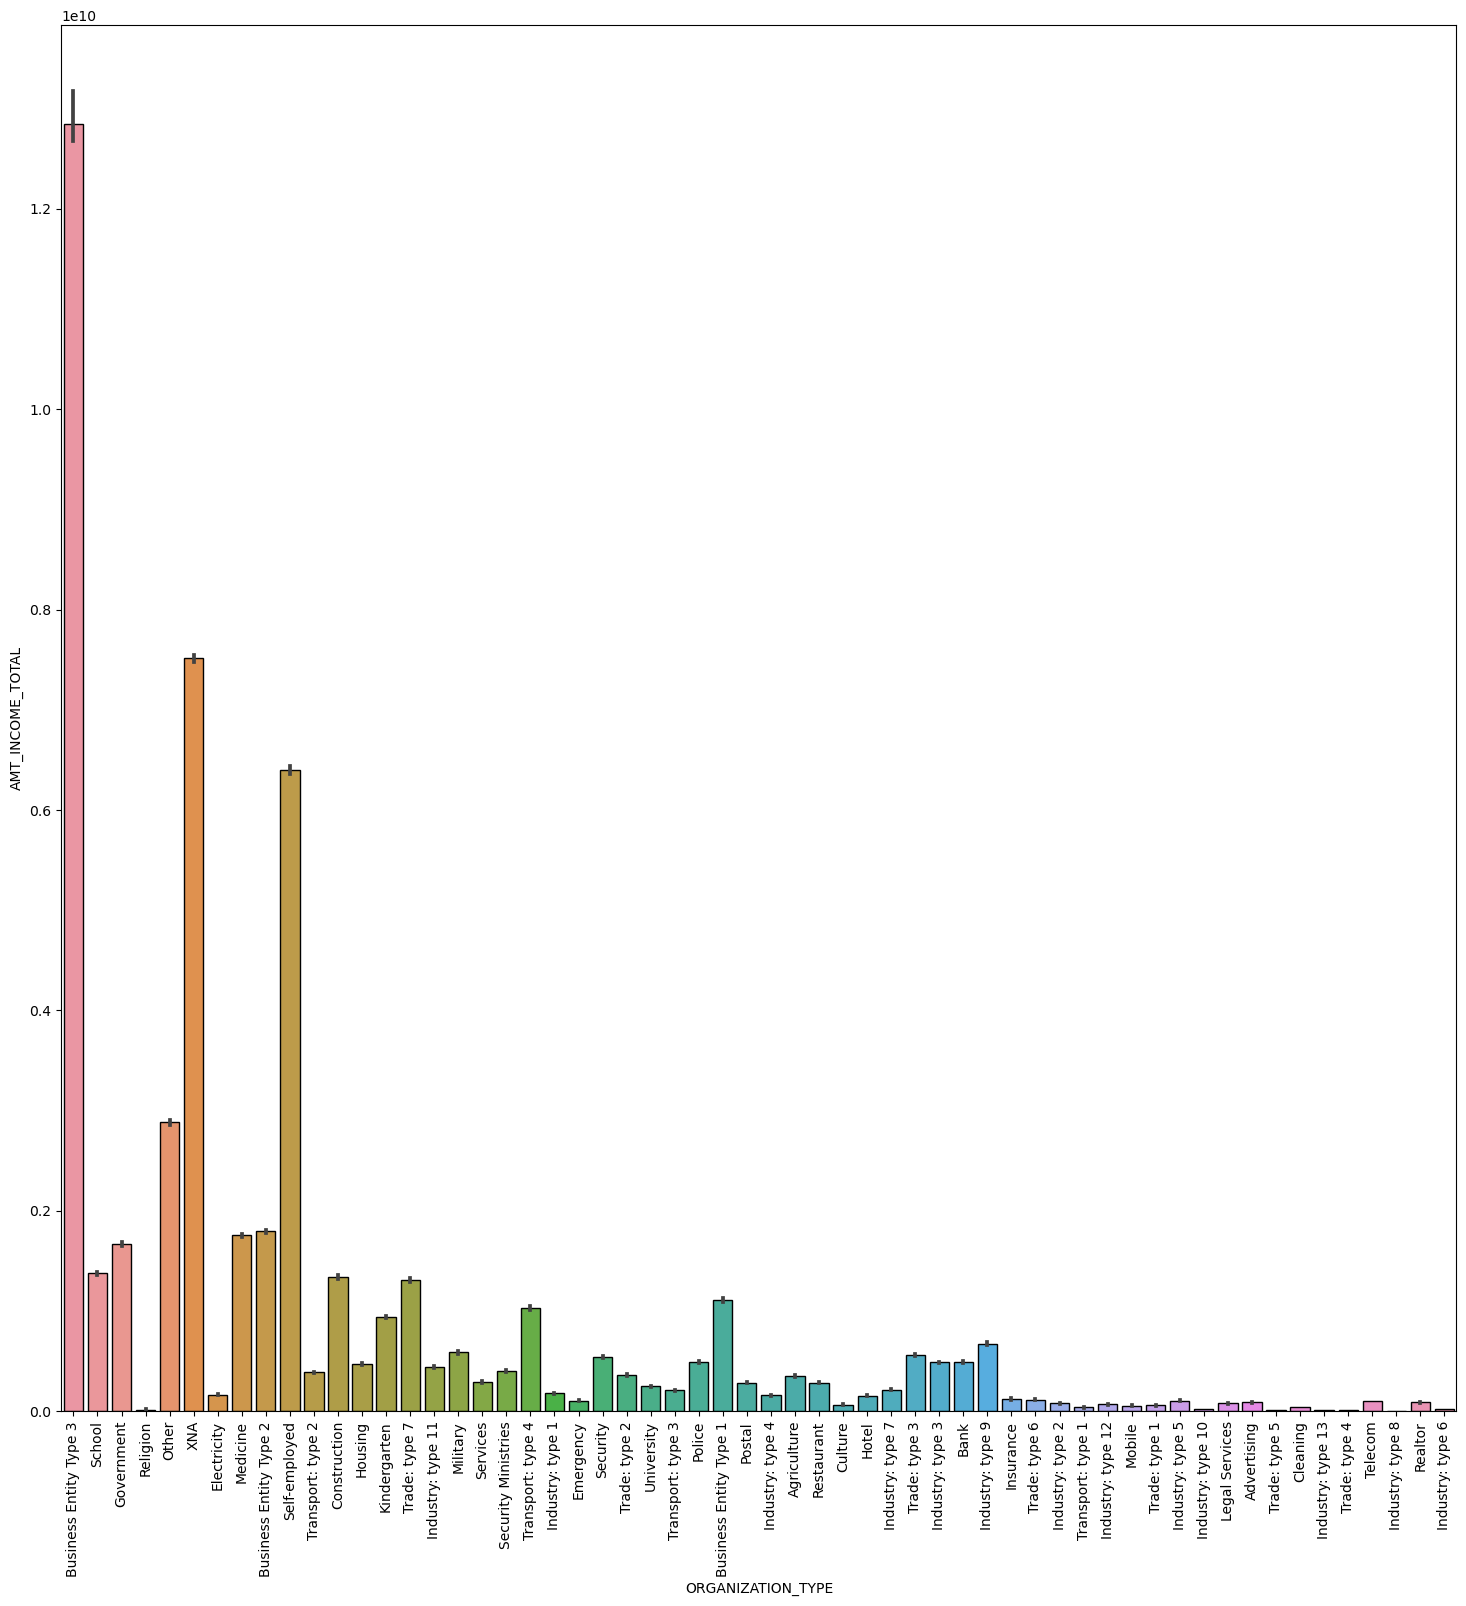

In [62]:
print(da.groupby("ORGANIZATION_TYPE")["AMT_INCOME_TOTAL"].sum())

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(18,18))
sns.barplot(x="ORGANIZATION_TYPE",y="AMT_INCOME_TOTAL",data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

ORGANIZATION_TYPE
Advertising                266394888.00
Agriculture               1370124031.50
Bank                      1516645246.50
Business Entity Type 1    3726714879.00
Business Entity Type 2    6257352051.00
Business Entity Type 3   42349631166.00
Cleaning                   141976575.00
Construction              4285885099.50
Culture                    243363739.50
Electricity                589781884.50
Emergency                  328916844.00
Government                6387846574.50
Hotel                      577671034.50
Housing                   1808533867.50
Industry: type 1           615855559.50
Industry: type 10           74354773.50
Industry: type 11         1581376774.50
Industry: type 12          246591423.00
Industry: type 13           36984249.00
Industry: type 2           268050307.50
Industry: type 3          1795419283.50
Industry: type 4           515173536.00
Industry: type 5           372765145.50
Industry: type 6            61754611.50
Industry: type 7      

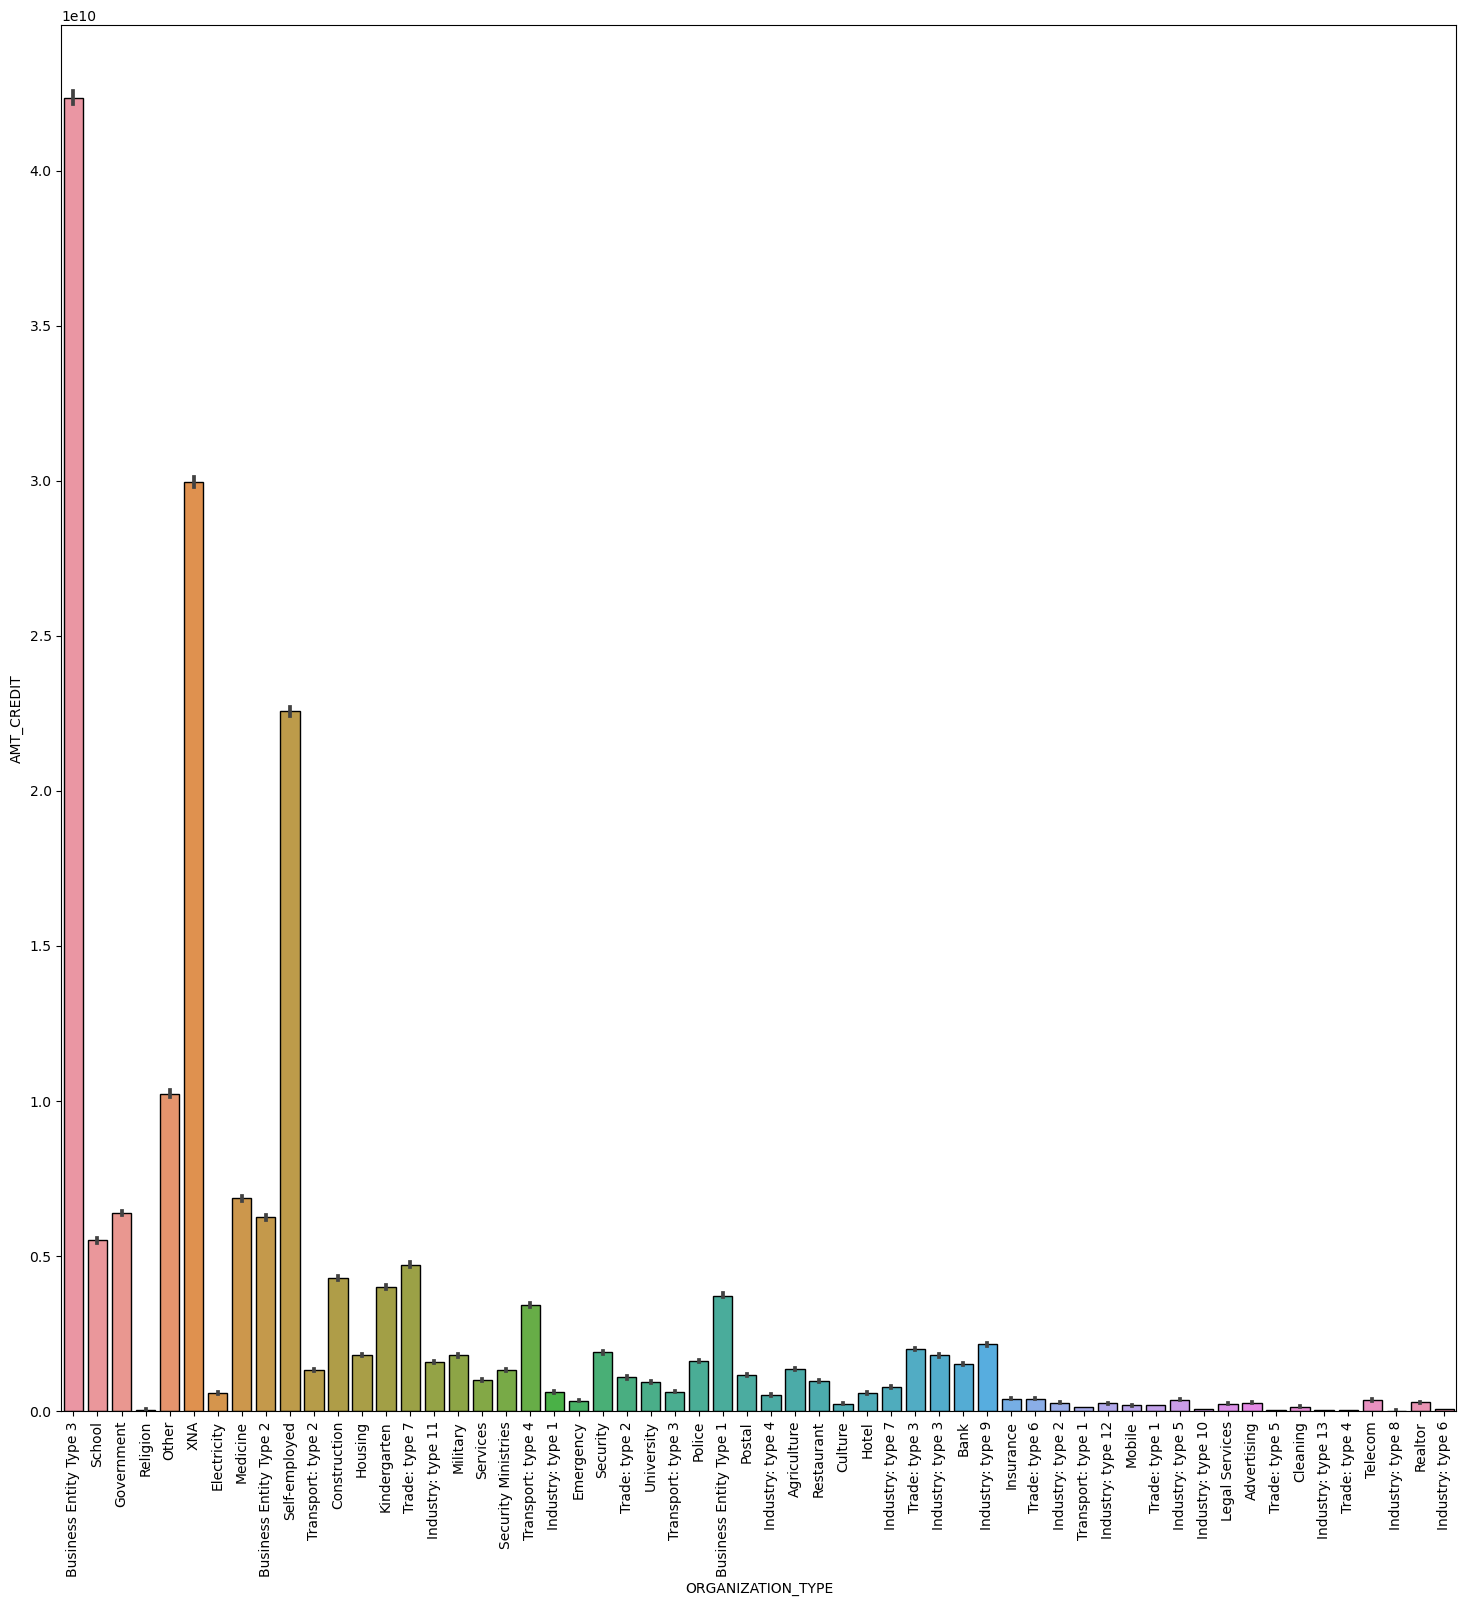

In [63]:
print(da.groupby("ORGANIZATION_TYPE")["AMT_CREDIT"].sum())

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(18,18))
sns.barplot(x="ORGANIZATION_TYPE",y="AMT_CREDIT",data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

TARGET  NAME_FAMILY_STATUS  
0       Married                30910810327.92
        Single / not married    6872424543.72
        Civil marriage          4497627860.73
        Separated               3100286569.50
1       Married                 2516226426.00
0       Widow                   2159988550.07
1       Single / not married     705718543.50
        Civil marriage           478285708.50
        Separated                270592987.50
        Widow                    133036299.00
Name: AMT_INCOME_TOTAL, dtype: float64


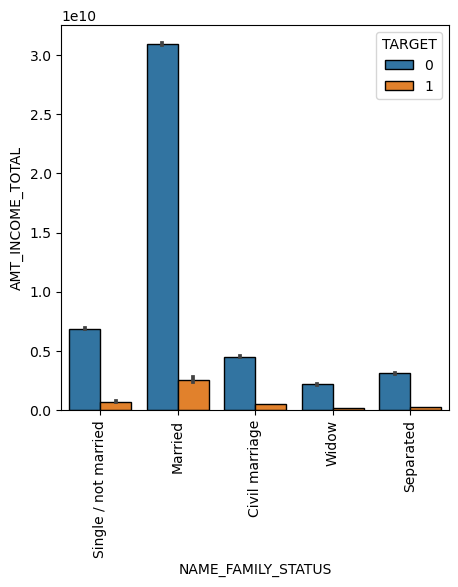

In [64]:
print(da.groupby(["TARGET","NAME_FAMILY_STATUS"])["AMT_INCOME_TOTAL"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="NAME_FAMILY_STATUS",y="AMT_INCOME_TOTAL",hue="TARGET",data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);
#nilai penghasilan tertinggi jatuh pada Single / not married

TARGET  NAME_FAMILY_STATUS  
0       Married                117097683543.00
        Single / not married    20722144252.50
        Civil marriage          14588120317.50
        Separated               10030653382.50
1       Married                  8858218063.50
0       Widow                    7387341619.50
1       Single / not married     2132340025.50
        Civil marriage           1495485355.50
        Separated                 855881847.00
        Widow                     490189158.00
Name: AMT_CREDIT, dtype: float64


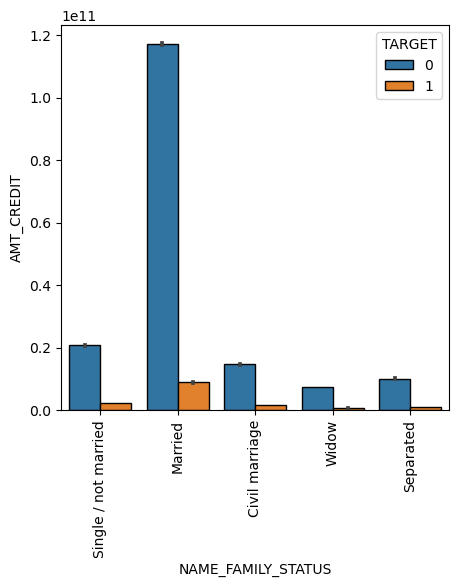

In [65]:
print(da.groupby(["TARGET","NAME_FAMILY_STATUS"])["AMT_CREDIT"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="NAME_FAMILY_STATUS",y="AMT_CREDIT",hue="TARGET",data=da,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);
#nilai credit tertinggi jatuh pada married & separated

TARGET  REGION_RATING_CLIENT
0       2                      33623418985.88
        1                       7369304035.50
        3                       6548414830.56
1       2                       2964238834.50
        3                        784843344.00
        1                        354777786.00
Name: AMT_INCOME_TOTAL, dtype: float64


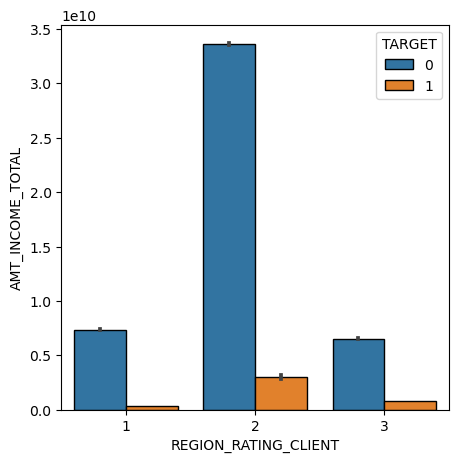

In [66]:
print(da.groupby(["TARGET","REGION_RATING_CLIENT"])["AMT_INCOME_TOTAL"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="REGION_RATING_CLIENT",y="AMT_INCOME_TOTAL",hue="TARGET",data=da,estimator=sum,edgecolor="black");

TARGET  REGION_RATING_CLIENT
0       2                      121820494248.00
        3                       24748607385.00
        1                       23256841482.00
1       2                        9844189317.00
        3                        2928839382.00
        1                        1059085750.50
Name: AMT_CREDIT, dtype: float64


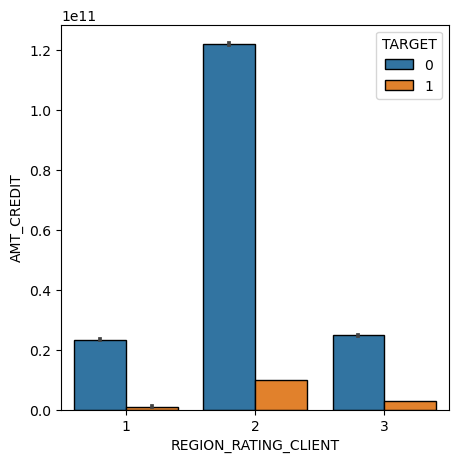

In [67]:
print(da.groupby(["TARGET","REGION_RATING_CLIENT"])["AMT_CREDIT"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="REGION_RATING_CLIENT",y="AMT_CREDIT",hue="TARGET",data=da,estimator=sum,edgecolor="black");

In [68]:
da.groupby("NAME_FAMILY_STATUS")["TARGET"].value_counts().to_frame()

#perbandingan status keluarga dengan variabel target, didapat nilai 0 terbesar pada married

TARGET
NAME_FAMILY_STATUS   TARGET        
Civil marriage       0        26703
                     1         2951
Married              0       180843
                     1        14819
Separated            0        18070
                     1         1615
Single / not married 0        40718
                     1         4447
Widow                0        15097
                     1          936

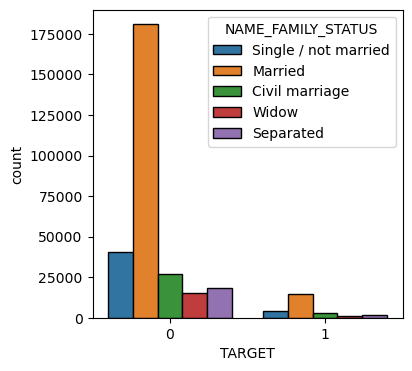

In [69]:
plt.figure(figsize=(4,4))
sns.countplot(x="TARGET",hue="NAME_FAMILY_STATUS",data=da,edgecolor="black");

#perbandingan status keluarga dengan variabel target, didapat nilai 0 terbesar pada married

In [70]:
da.groupby("TARGET")["ORGANIZATION_TYPE"].value_counts().to_frame()

#perbandingan status organisasi dengan variabel target, didapat nilai 0 terbesar pada bussines tipe 3 & XNA

ORGANIZATION_TYPE
TARGET ORGANIZATION_TYPE                        
0      Business Entity Type 3              61354
       XNA                                 52199
       Self-employed                       34341
       Other                               15346
       Medicine                            10403
...                                          ...
1      Industry: type 10                       7
       Religion                                5
       Industry: type 8                        3
       Trade: type 5                           3
       Trade: type 4                           2

[116 rows x 1 columns]

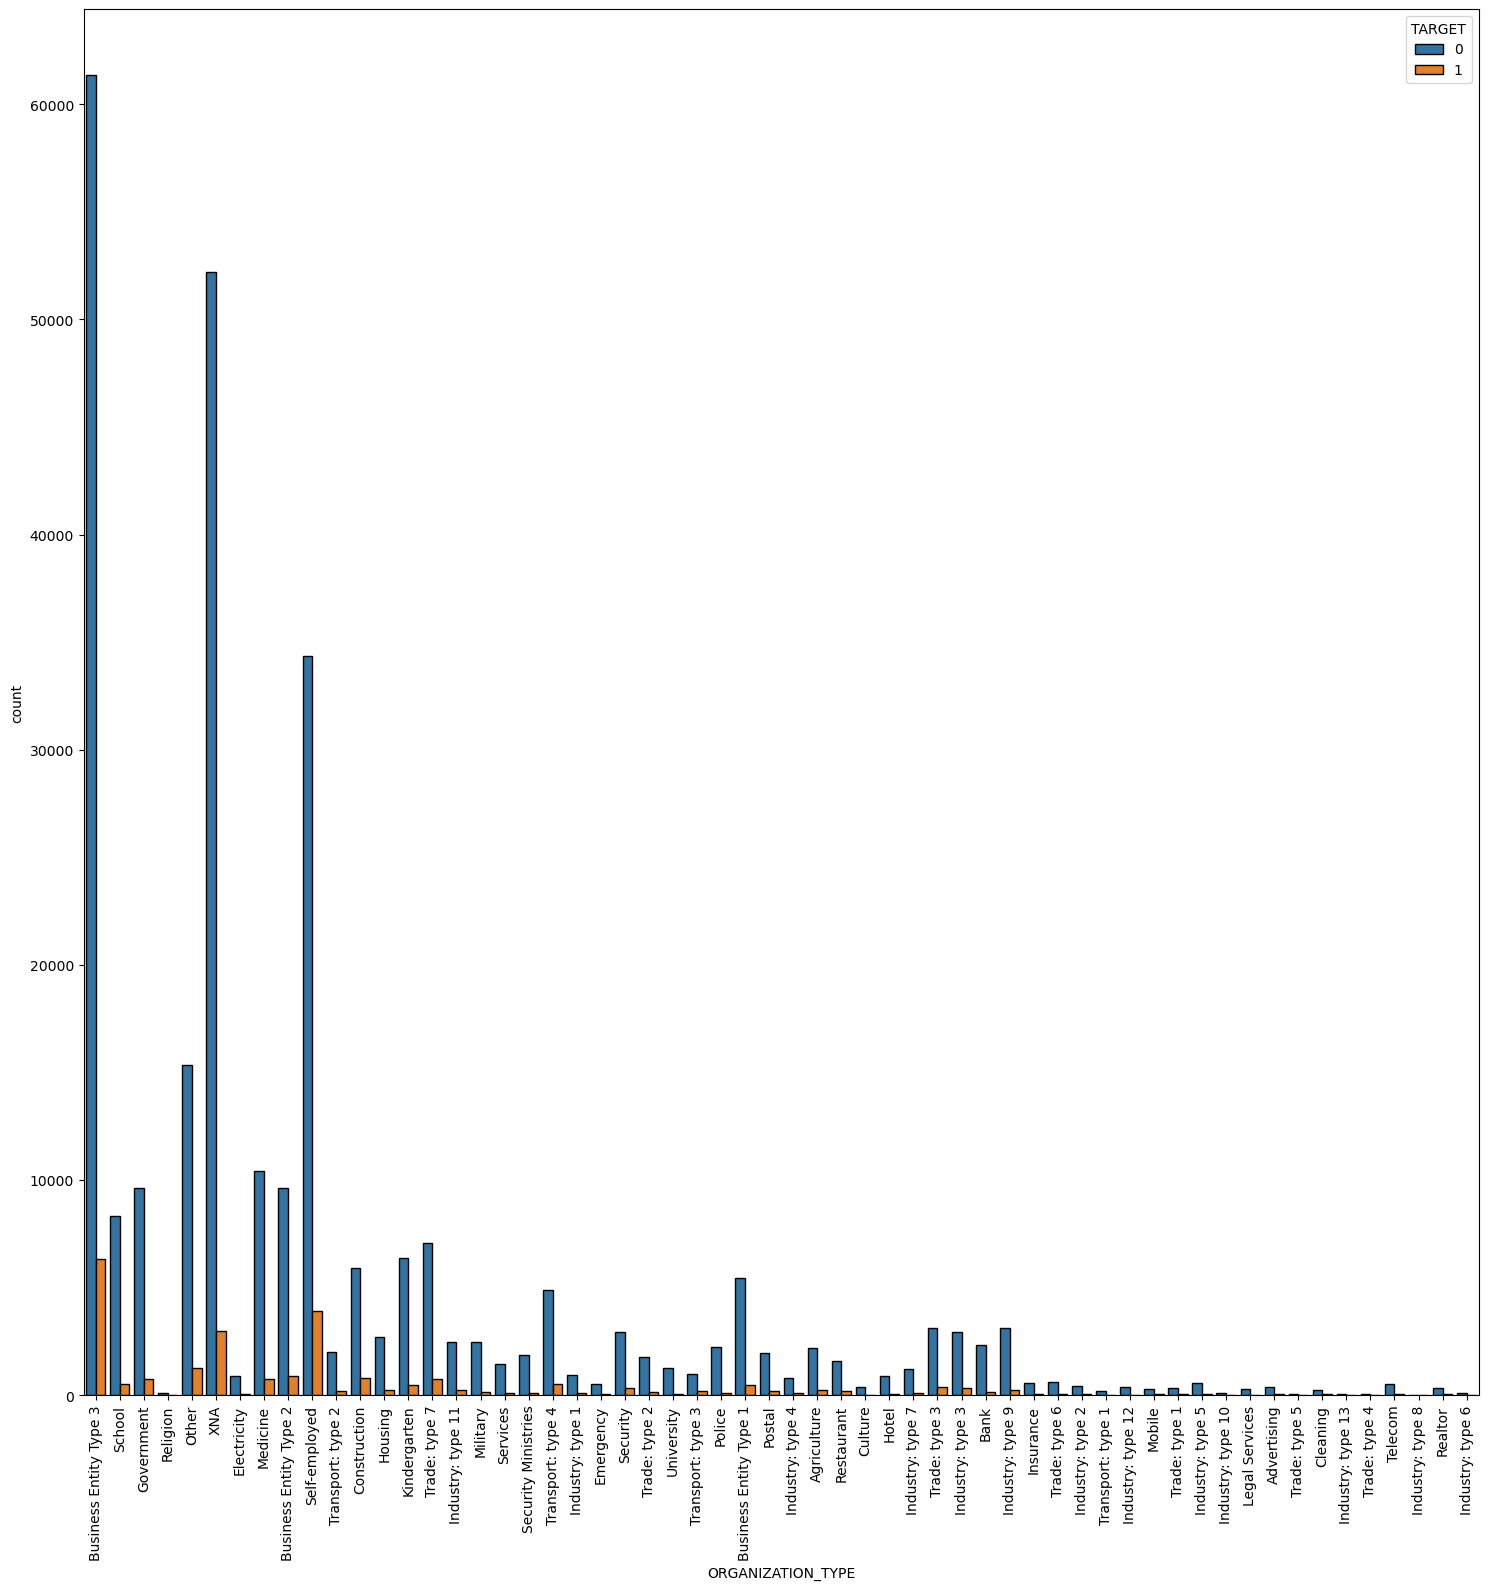

In [71]:
plt.figure(figsize=(18,18))
sns.countplot(x="ORGANIZATION_TYPE",hue="TARGET",data=da,edgecolor="black")
plt.xticks(rotation=90);

## previous_application

NAME_CONTRACT_TYPE  NAME_CONTRACT_STATUS
Cash loans          Approved               131557235485.32
                    Refused                 88145890499.88
Consumer loans      Approved                56186663308.65
Revolving loans     Approved                10670643000.00
                    Refused                  8649774000.00
Consumer loans      Refused                  7790421719.25
Cash loans          Canceled                 7412731713.77
Revolving loans     Canceled                  106767000.00
Consumer loans      Unused offer               80263158.44
                    Canceled                   73177101.63
Name: AMT_CREDIT, dtype: float64


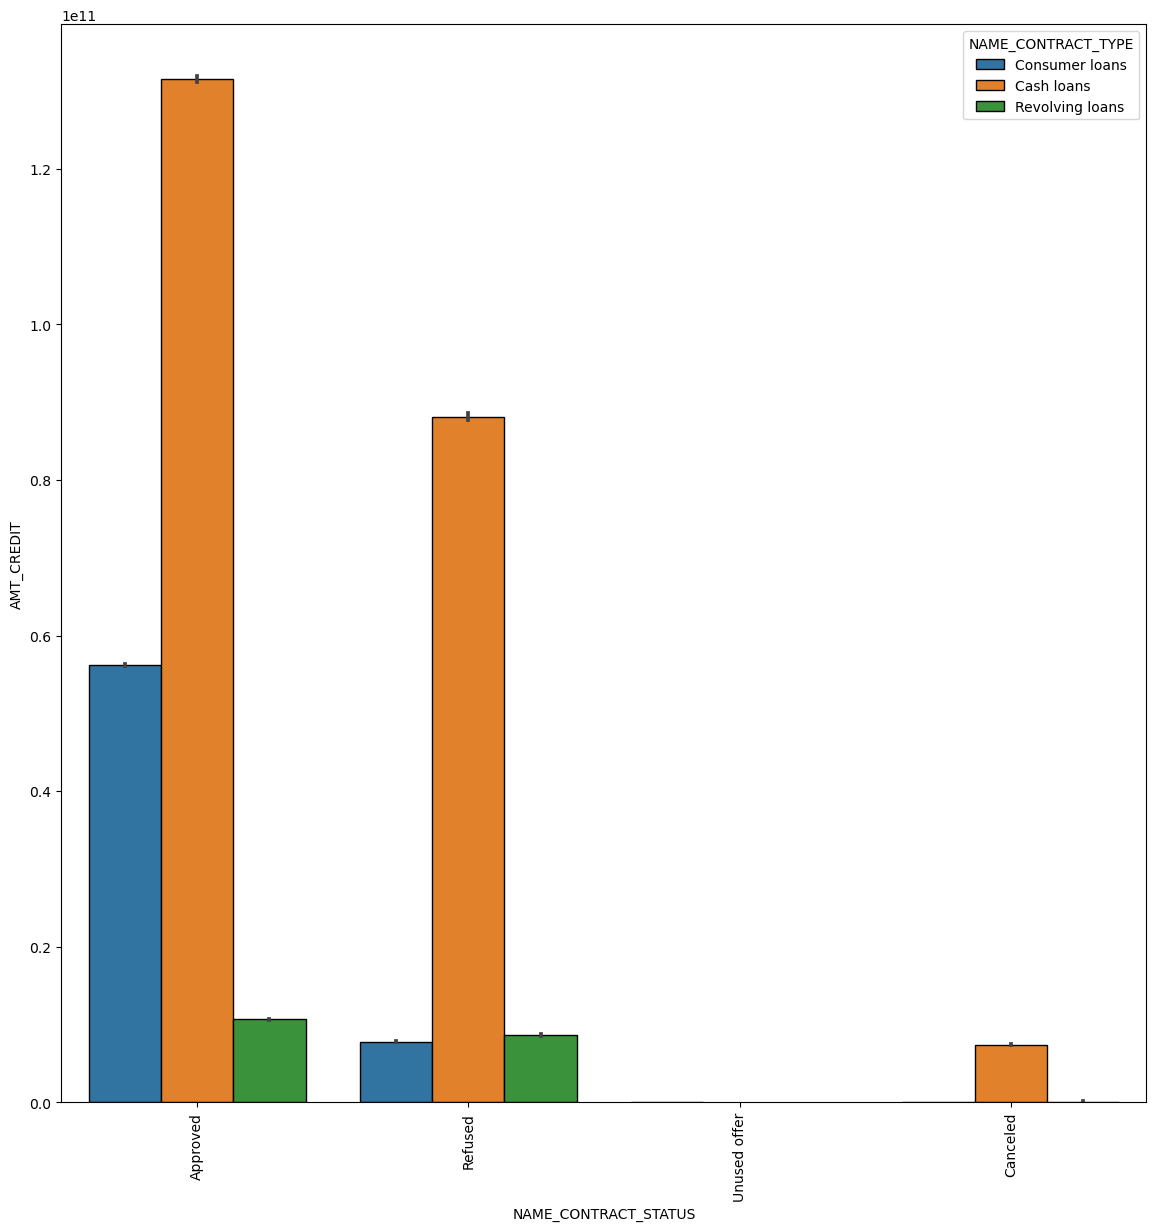

In [72]:
print(dd.groupby(["NAME_CONTRACT_TYPE","NAME_CONTRACT_STATUS"])["AMT_CREDIT"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(14,14))
sns.barplot(x="NAME_CONTRACT_STATUS",y="AMT_CREDIT",hue="NAME_CONTRACT_TYPE",data=dd,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);
#banyaknya credit dari tipe contrak dan status kontrak

NAME_PRODUCT_TYPE  NAME_CASH_LOAN_PURPOSE          
x-sell             XNA                                176223948839.10
XNA                XAP                                 64130525287.96
walk-in            XNA                                 15405941466.00
x-sell             XAP                                 14134599000.00
walk-in            Repairs                             12822833447.73
                   Other                                6361177710.24
                   XAP                                  5292585000.00
                   Urgent needs                         2718367609.50
                   Building a house or an annex         2622384256.36
                   Buying a used car                    2242841788.03
                   Payments on other loans              1542426493.18
                   Buying a new car                     1305809030.74
                   Buying a home                        1129359762.00
                   Buying a holiday ho

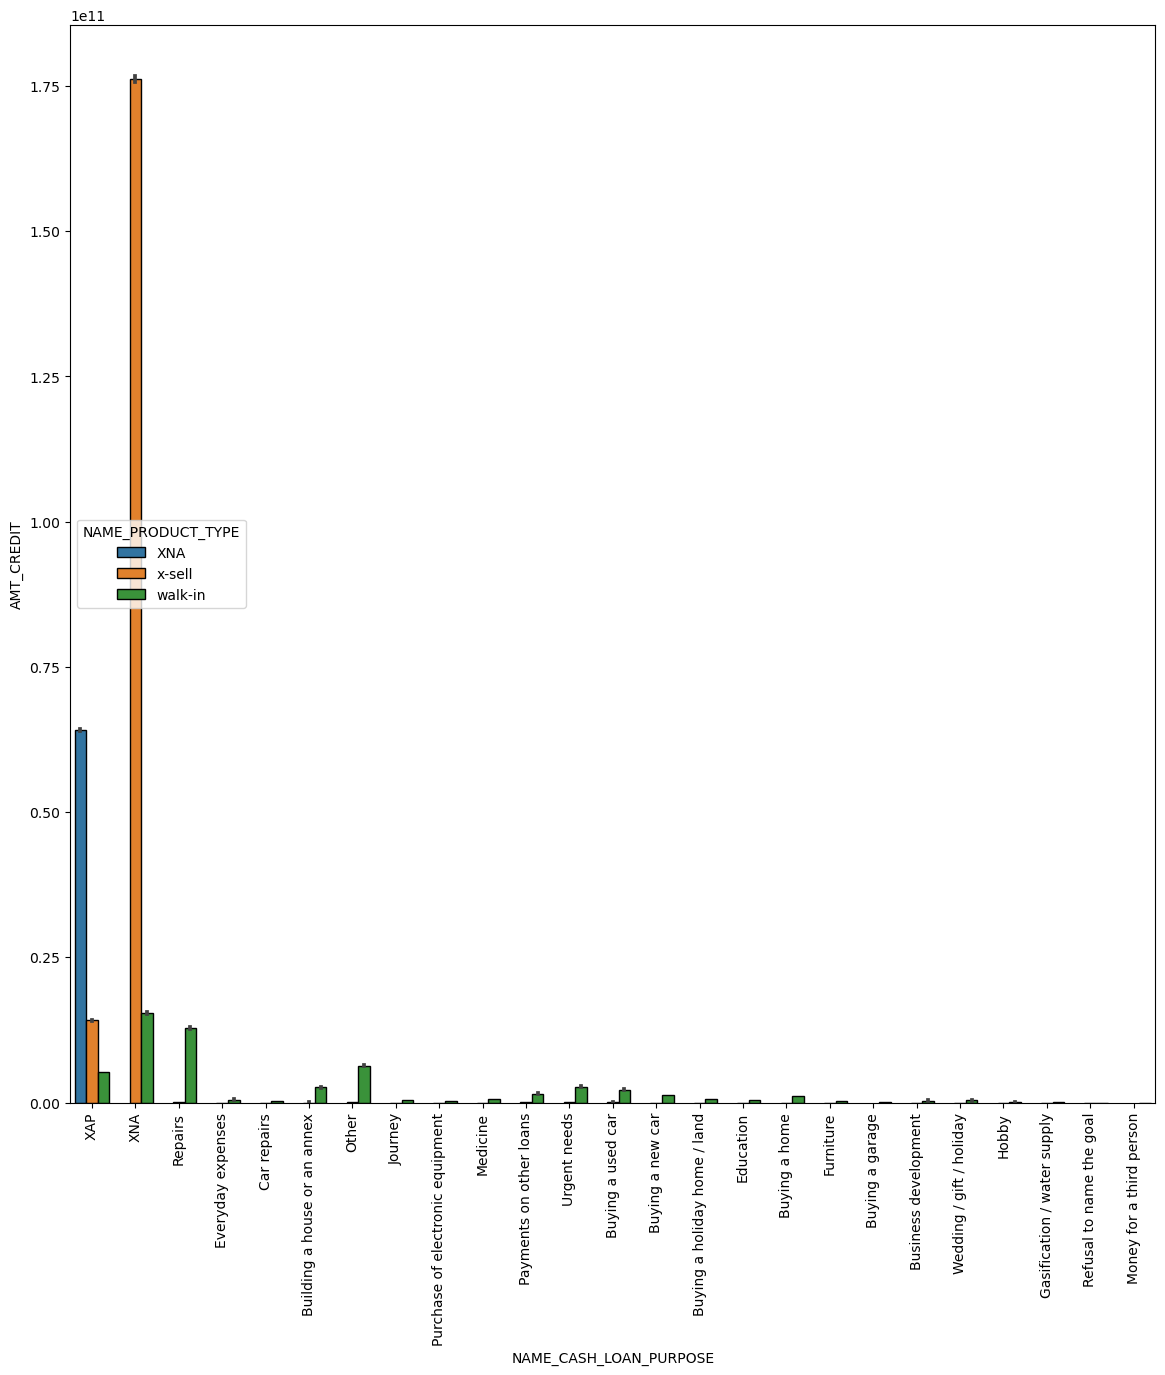

In [73]:
print(dd.groupby(["NAME_PRODUCT_TYPE","NAME_CASH_LOAN_PURPOSE"])["AMT_CREDIT"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(14,14))
sns.barplot(x="NAME_CASH_LOAN_PURPOSE",y="AMT_CREDIT",hue="NAME_PRODUCT_TYPE",data=dd,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

#banyaknya jumah credit dari tiap-tiap produk_type dan status alasan mengambil credit

NAME_CONTRACT_STATUS  CHANNEL_TYPE              
Approved              Credit and cash offices      114657408143.15
Refused               Credit and cash offices       72017417502.40
Approved              Country-wide                  34682302594.57
                      Stone                         19641571807.68
                      Regional / Local              10203802021.40
                      AP+ (Cash loan)                8927654421.06
Refused               Contact center                 8806589230.50
Approved              Contact center                 8732589028.56
Refused               AP+ (Cash loan)                8547161316.44
                      Country-wide                   6890888770.43
Canceled              Contact center                 5801434147.31
Refused               Stone                          3666675179.25
                      Channel of corporate sales     2822912244.54
                      Regional / Local               1669311739.58
Canceled     

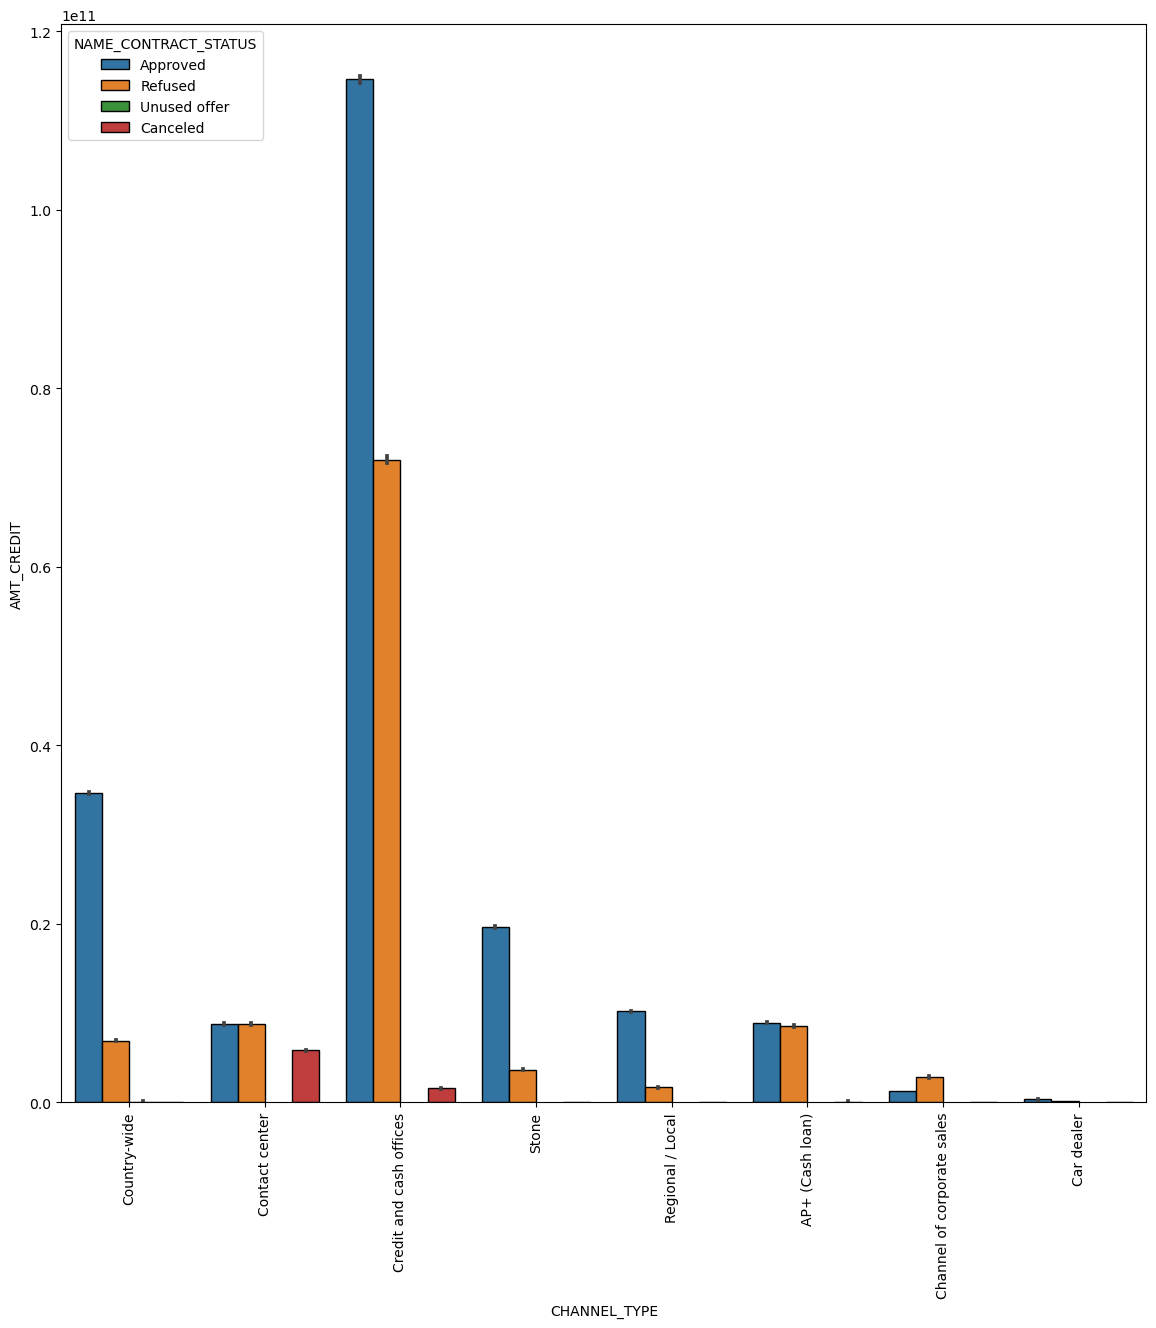

In [74]:
print(dd.groupby(["NAME_CONTRACT_STATUS","CHANNEL_TYPE"])["AMT_CREDIT"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(14,14))
sns.barplot(x="CHANNEL_TYPE",y="AMT_CREDIT",hue="NAME_CONTRACT_STATUS",data=dd,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

#banyaknya jumah credit dari channel_type dan status kontraknya

NAME_YIELD_GROUP  PRODUCT_COMBINATION           
low_normal        Cash X-Sell: low                 80553148315.11
middle            Cash X-Sell: middle              54841956804.86
low_normal        Cash Street: low                 21523239835.24
low_action        Cash X-Sell: low                 17790025756.50
high              Cash X-Sell: high                16909981792.16
middle            Cash Street: middle              14393948705.82
XNA               Card X-Sell                      13977180000.00
middle            POS household with interest      11338701254.86
low_action        Cash Street: low                 10771056953.15
high              Cash Street: high                10332499536.14
low_normal        POS industry with interest        8393747076.54
                  POS household with interest       7409814864.98
low_action        POS household without interest    7188151475.74
high              POS mobile with interest          6330647732.31
middle            POS indus

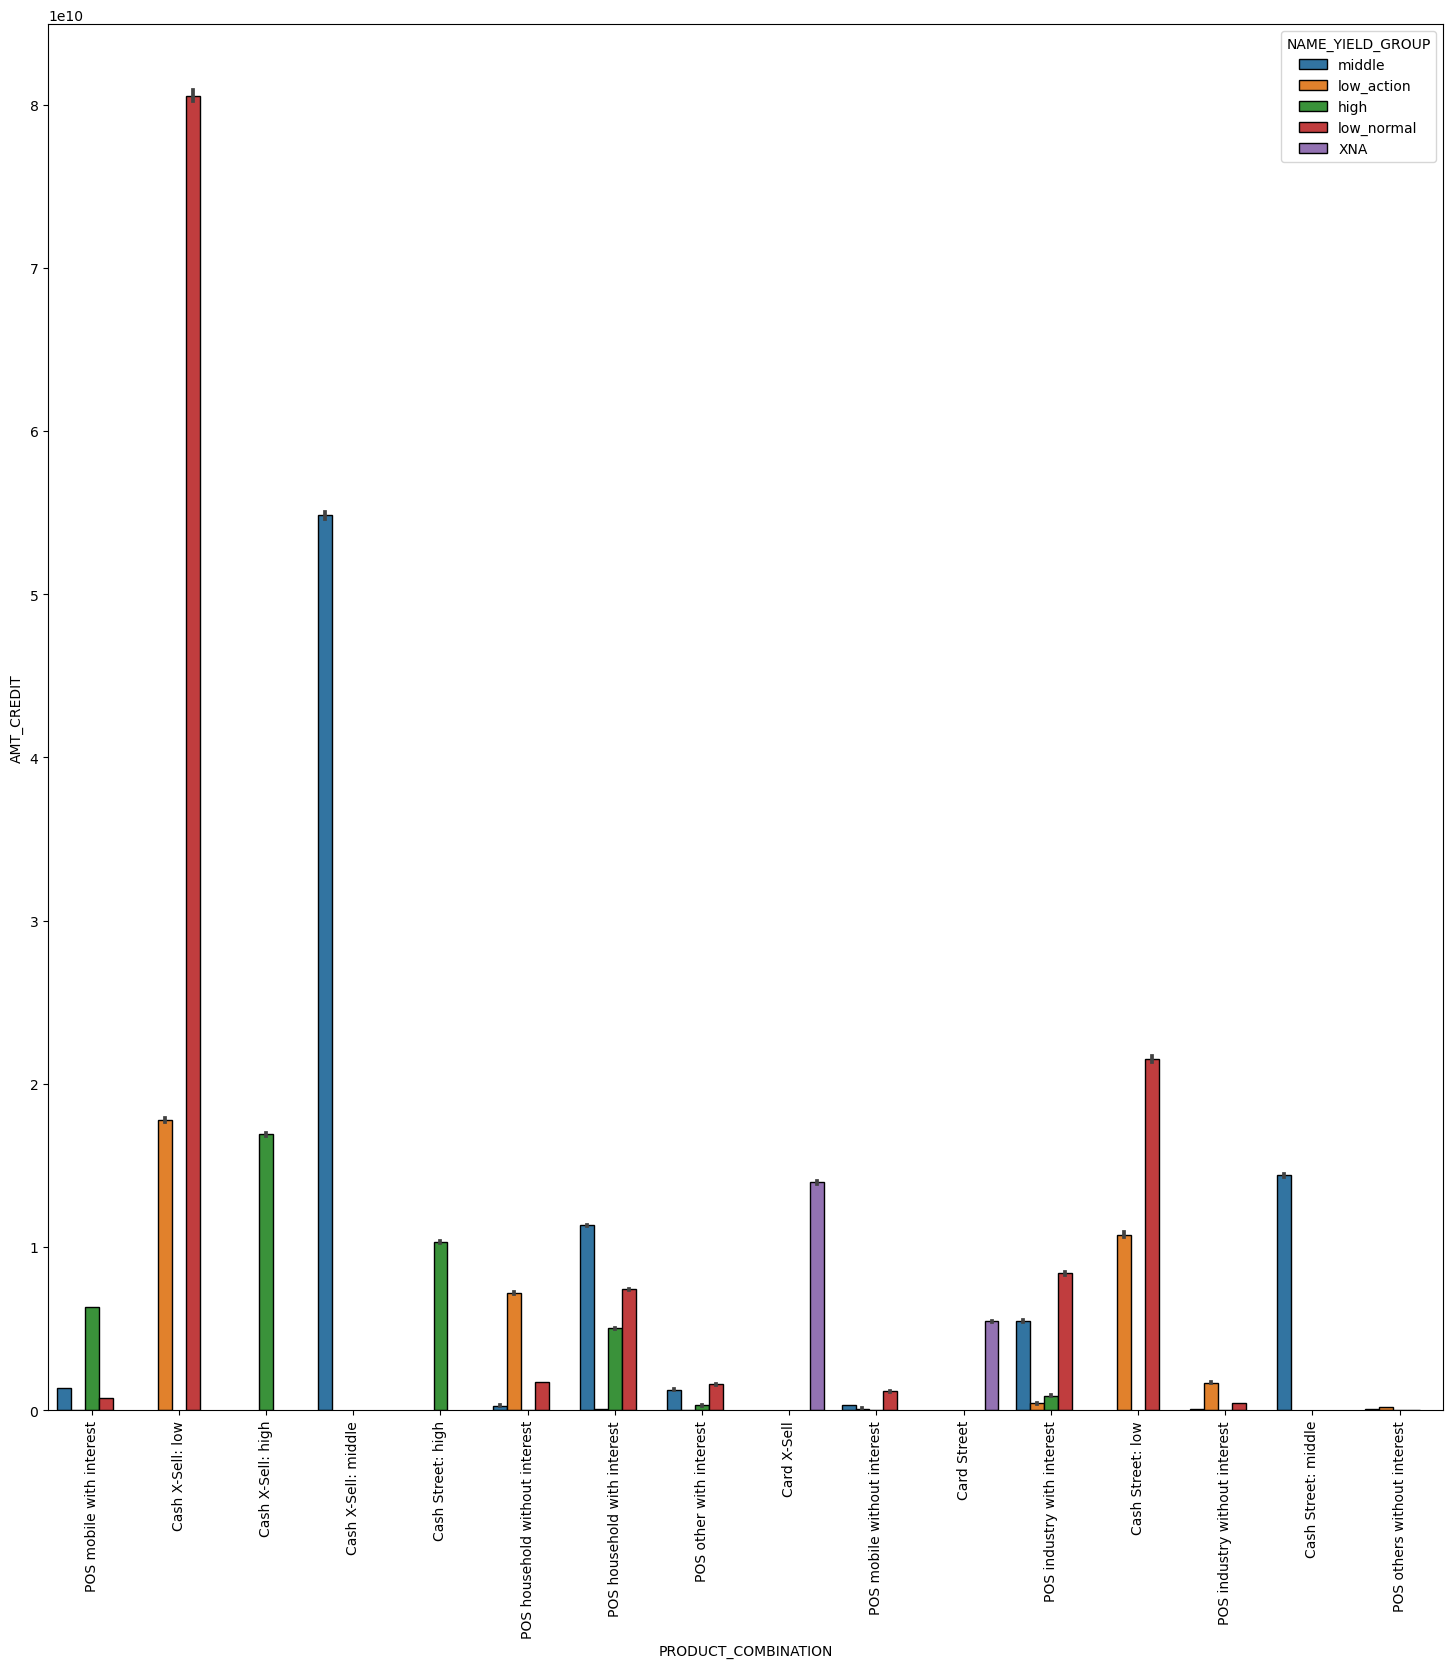

In [75]:
print(dd.groupby(["NAME_YIELD_GROUP","PRODUCT_COMBINATION"])["AMT_CREDIT"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(18,18))
sns.barplot(x="PRODUCT_COMBINATION",y="AMT_CREDIT",hue="NAME_YIELD_GROUP",data=dd,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

#banyaknya jumah credit dari channel_type dan status kontraknya

NAME_SELLER_INDUSTRY
Auto technology           736143952.50
Clothing                 4495415796.00
Connectivity            14248561933.40
Construction             4496255028.00
Consumer electronics    40964992439.04
Furniture                8738173170.00
Industry                 3027211587.49
Jewelry                   220041266.76
MLM partners              236330361.27
Tourism                   139391023.50
XNA                    233371050428.97
Name: AMT_CREDIT, dtype: float64


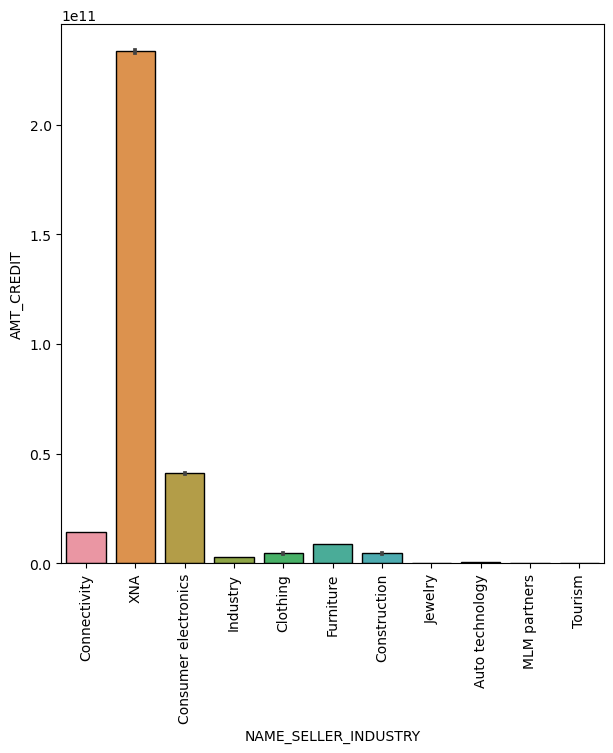

In [76]:
# hubungan antara jumlah credir dengan bidang industry
print(dd.groupby("NAME_SELLER_INDUSTRY")["AMT_CREDIT"].sum())
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(7,7))
sns.barplot(x="NAME_SELLER_INDUSTRY",y=dd["AMT_CREDIT"],data=dd,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

## credit_card_balance

In [ ]:
print(dg.groupby("NAME_CONTRACT_STATUS")["MONTHS_BALANCE"].sum())
pd.options.display.float_format = '{:.2f}'.format

#status contract dengan mountly balance

## bureau

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64


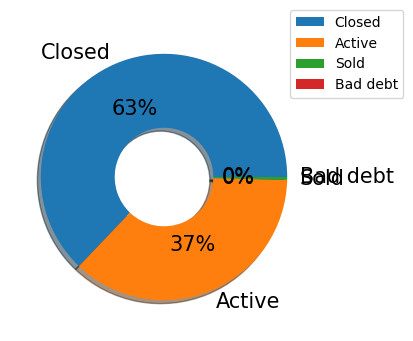

In [69]:
#banyaknya contrac tipe

L=['Closed','Active','Sold','Bad debt']
x=db["CREDIT_ACTIVE"].value_counts()
print(x)
plt.figure(figsize=(4,4))
plt.pie(x,labels=L,shadow=True,autopct="%0.0f%%",textprops={'fontsize': 15},wedgeprops={"width":0.6})
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.9));

CREDIT_ACTIVE  CREDIT_TYPE                                 
Closed         Consumer credit                                198035397008.23
Active         Consumer credit                                183480463434.81
               Mortgage                                        75402176850.63
               Credit card                                     54126588321.99
Closed         Car loan                                        28382323643.33
               Mortgage                                        21803822610.62
Active         Car loan                                        21073210962.79
Closed         Credit card                                     14914307275.69
Sold           Mortgage                                         3957286693.50
Closed         Loan for business development                    1946372280.35
Sold           Consumer credit                                  1615809800.61
               Car loan                                         1048686732.13
Acti

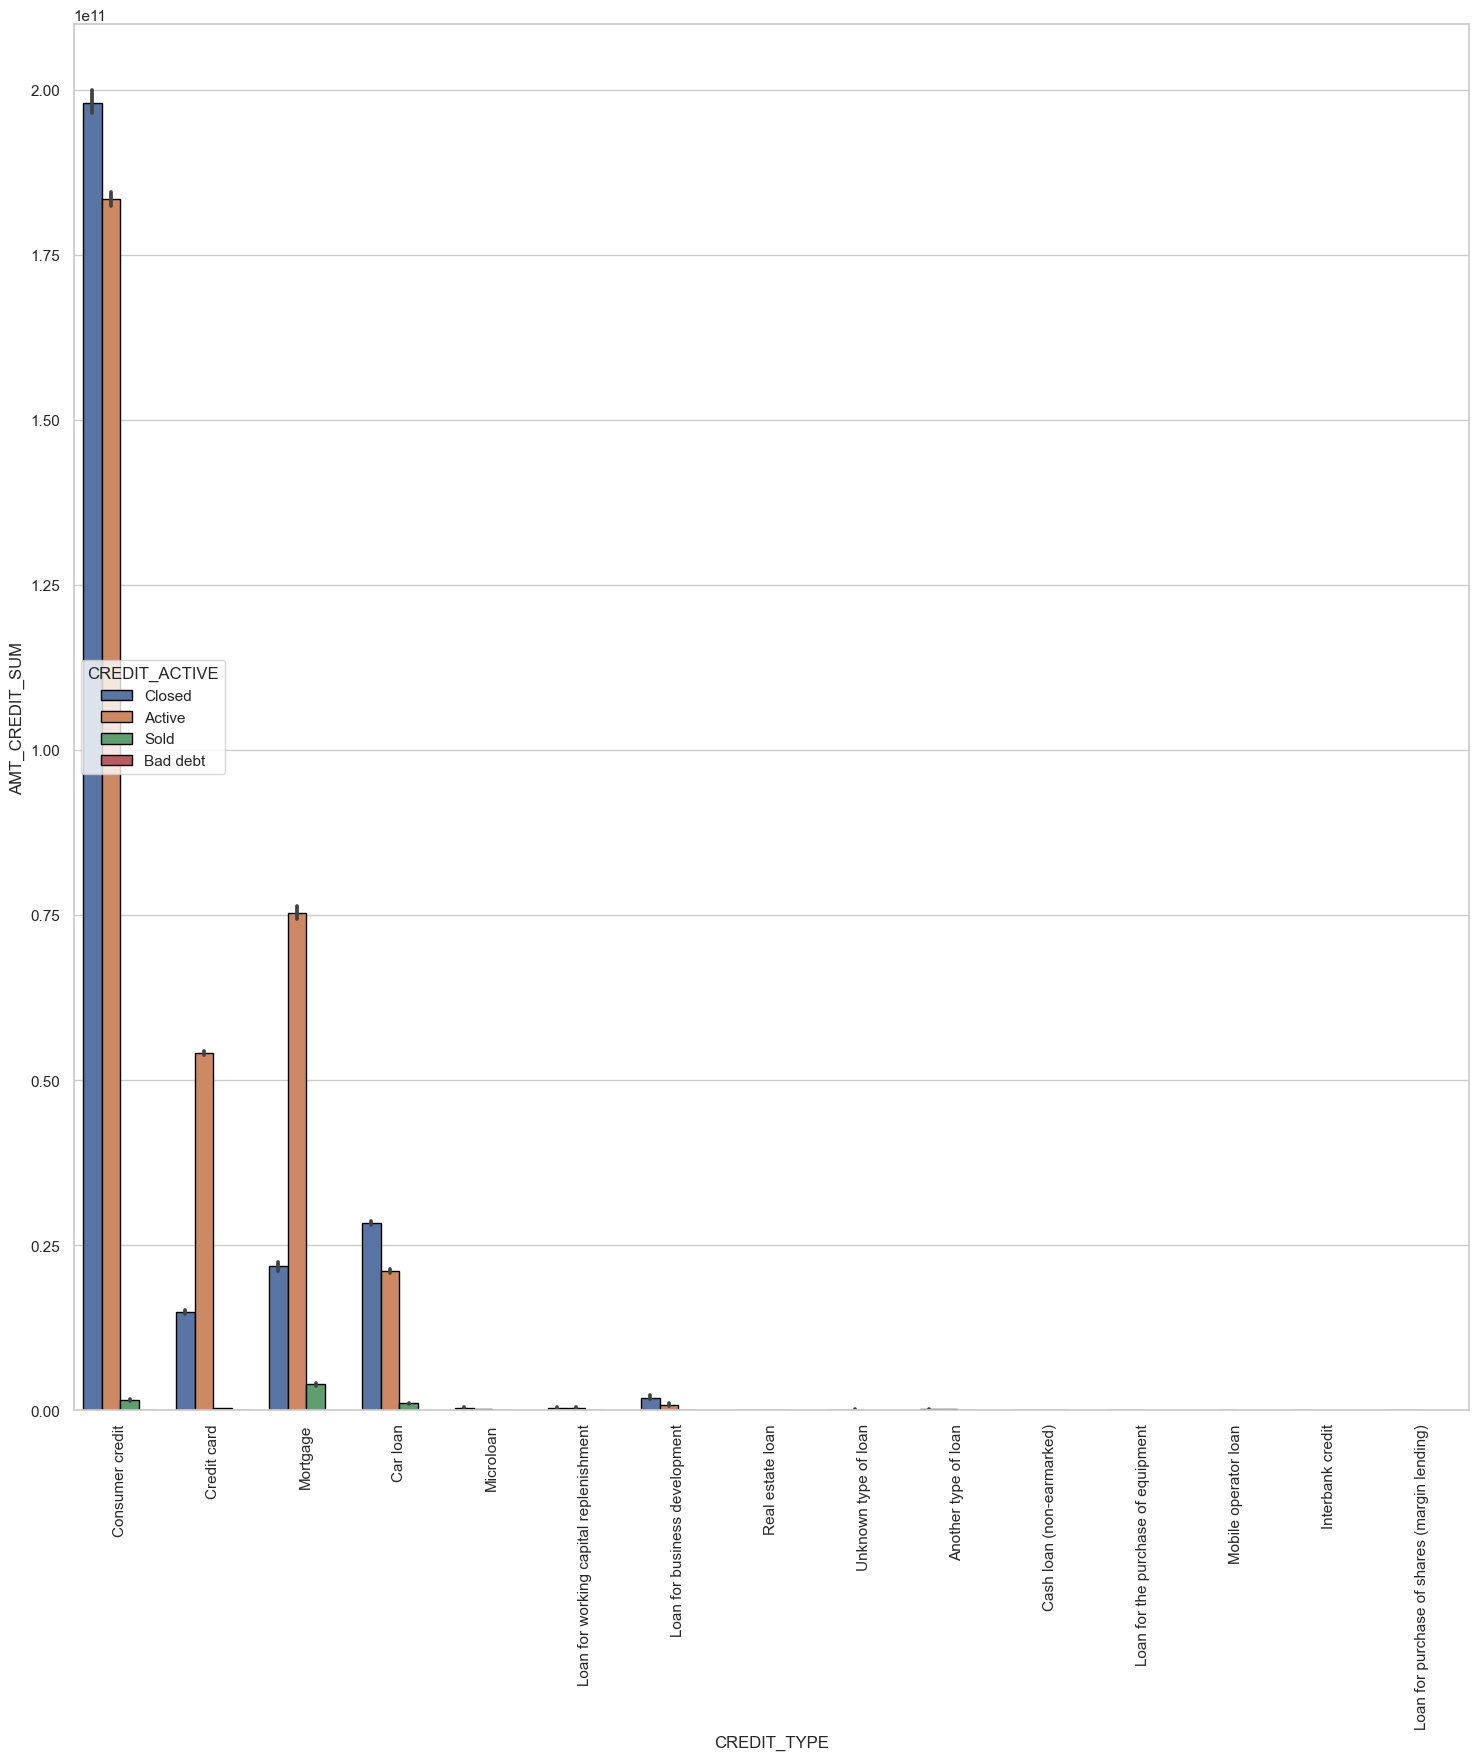

In [80]:
print(db.groupby(["CREDIT_ACTIVE","CREDIT_TYPE"])["AMT_CREDIT_SUM"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(18,18))
sns.barplot(x="CREDIT_TYPE",y="AMT_CREDIT_SUM",hue="CREDIT_ACTIVE",data=db,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

#banyknya jumlah credit pada credit_type dengan masing-masing statusnya

CREDIT_ACTIVE  CREDIT_TYPE                                 
Active         Consumer credit                                 963753
               Credit card                                     162768
Closed         Consumer credit                                 109618
Sold           Consumer credit                                  90624
               Credit card                                      49382
Active         Car loan                                          6485
Bad debt       Consumer credit                                   5854
Active         Mortgage                                          5585
Sold           Car loan                                          3173
Closed         Car loan                                          2868
Active         Another type of loan                              2262
Bad debt       Credit card                                        732
Closed         Credit card                                        493
Active         Microloan      

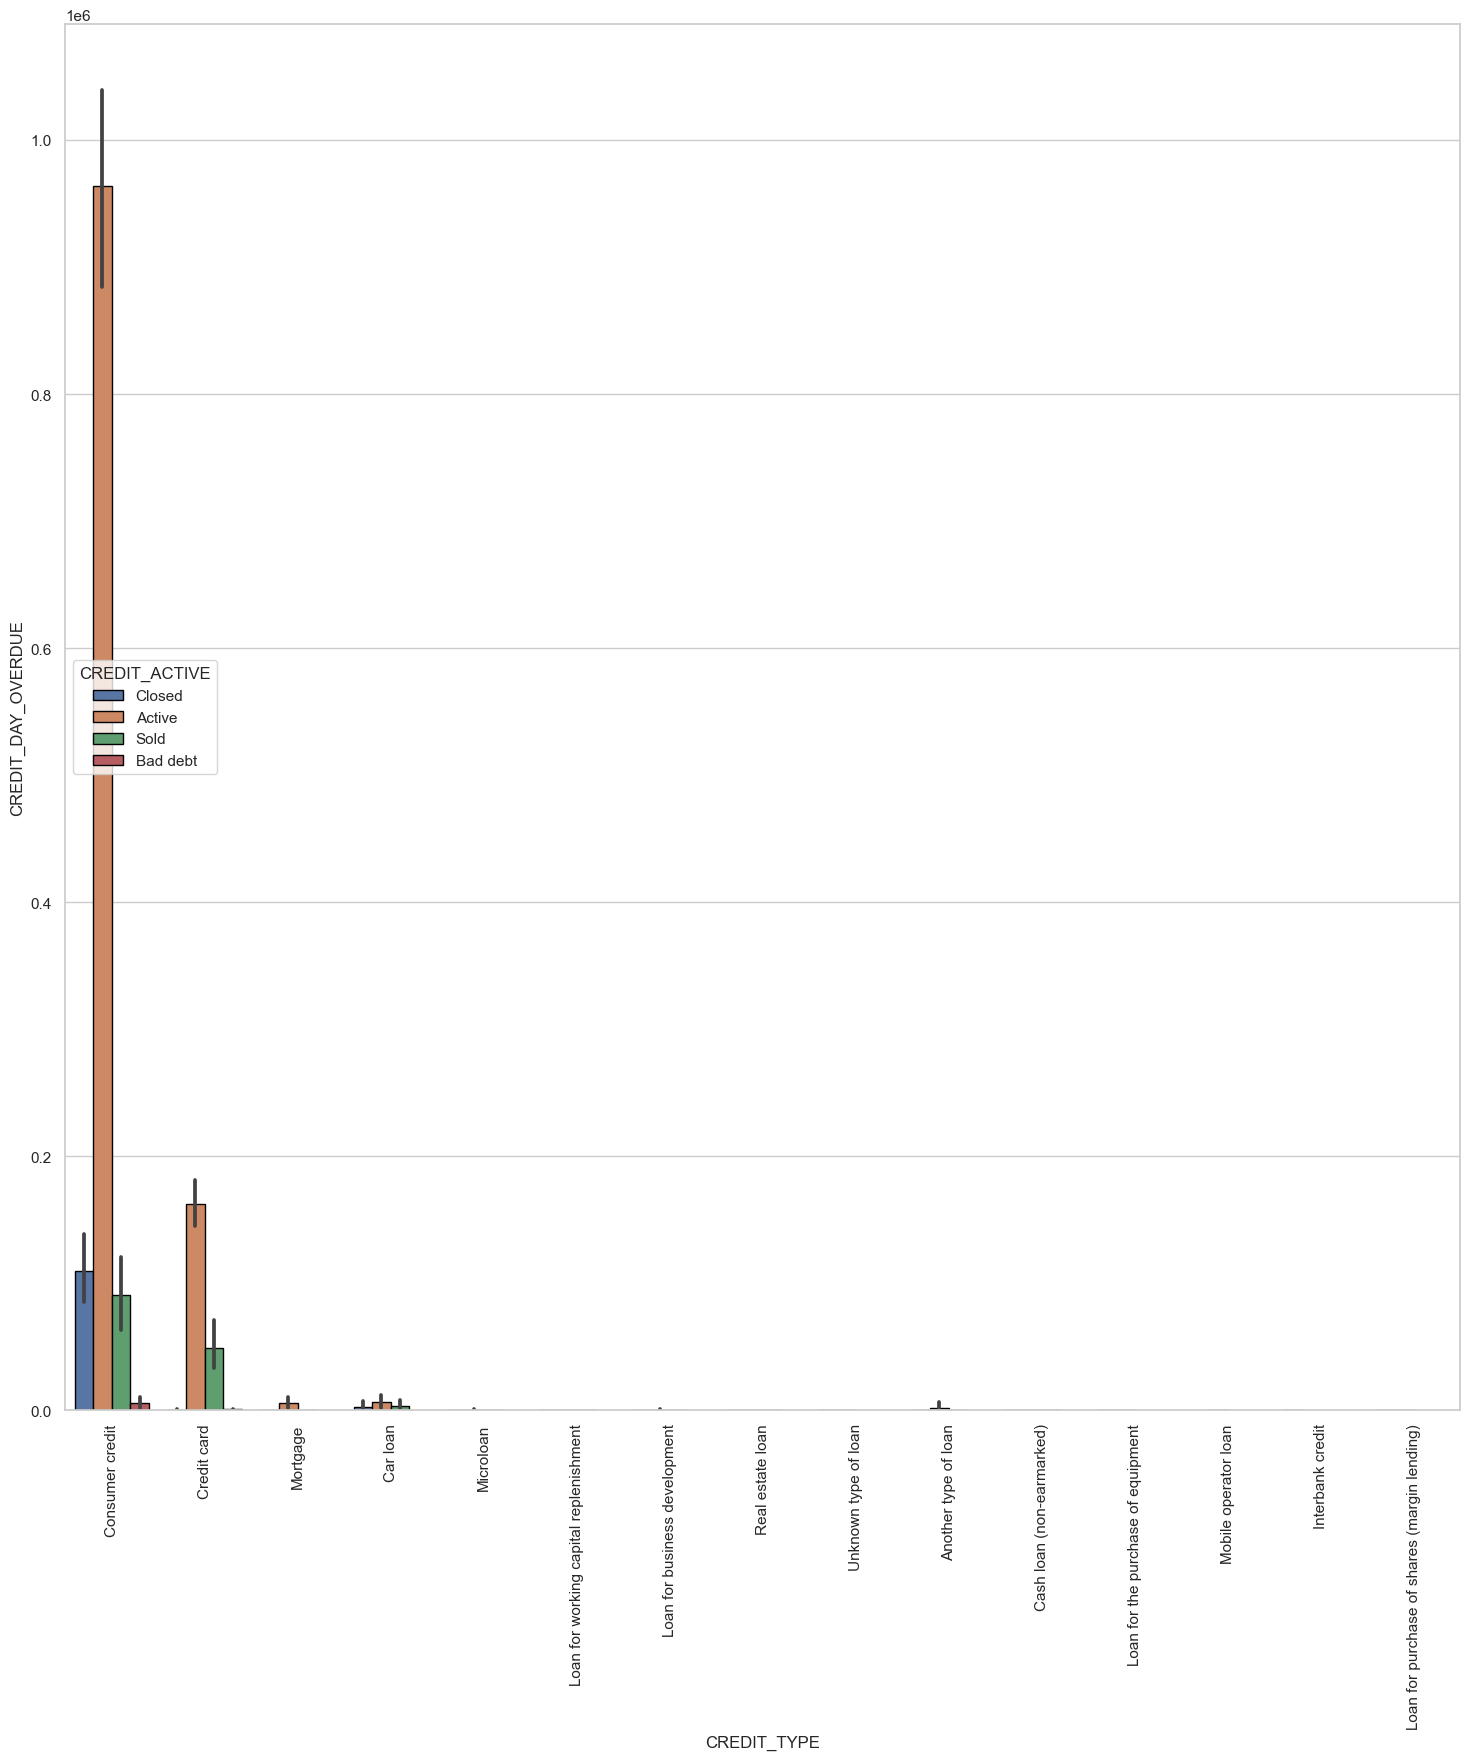

In [81]:
print(db.groupby(["CREDIT_ACTIVE","CREDIT_TYPE"])["CREDIT_DAY_OVERDUE"].sum().sort_values(ascending=False))

pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(18,18))
sns.barplot(x="CREDIT_TYPE",y="CREDIT_DAY_OVERDUE",hue="CREDIT_ACTIVE",data=db,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

#banyknya jumlah credit yang telat pada credit_type dengan masing-masing statusnya

In [ ]:
print(dc.groupby("STATUS")["MONTHS_BALANCE"].sum())
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="STATUS",y=dc["MONTHS_BALANCE"],data=dc,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

#perbandingan status dengan balance perbulan

STATUS
0    246929650
1      8574441
2      1145502
3       449462
4       290787
5      2527535
C    384436746
X    194891617
Name: MONTHS_BALANCE, dtype: int64


## POS_CASH_balance

In [ ]:
print(de.groupby("NAME_CONTRACT_STATUS")["MONTHS_BALANCE"].sum())
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(5,5))
sns.barplot(x="NAME_CONTRACT_STATUS",y=de["MONTHS_BALANCE"]/-1,data=de,estimator=sum,edgecolor="black")
plt.xticks(rotation=90);

# machine learning and implementasi

## Logistic Regression

In [2]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [3]:
#read data train baru yang sudah dilakukan cleansing data
tr = pd.read_csv("application_train_new.csv")

In [4]:
print(tr.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'OCCUPATION_TYPE1'],
      dtype='object')


In [5]:
dummies = pd.get_dummies(tr[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']], drop_first=True)
tr_final = tr.join(dummies)
dummies.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,0,1,0,0,1
1,0,0,0,0,0
2,1,1,0,1,1
3,0,0,0,0,1
4,0,1,0,0,1


In [6]:
tr_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306199 entries, 0 to 306198
Data columns (total 43 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SK_ID_CURR                          306199 non-null  int64  
 1   TARGET                              306199 non-null  int64  
 2   NAME_CONTRACT_TYPE                  306199 non-null  object 
 3   CODE_GENDER                         306199 non-null  object 
 4   FLAG_OWN_CAR                        306199 non-null  object 
 5   FLAG_OWN_REALTY                     306199 non-null  object 
 6   CNT_CHILDREN                        306199 non-null  int64  
 7   AMT_INCOME_TOTAL                    306199 non-null  float64
 8   AMT_CREDIT                          306199 non-null  float64
 9   AMT_ANNUITY                         306199 non-null  float64
 10  AMT_GOODS_PRICE                     306199 non-null  float64
 11  NAME_INCOME_TYPE          

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M','CODE_GENDER_XNA','FLAG_OWN_CAR_Y','FLAG_OWN_REALTY_Y','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'] 
X = tr_final[cols]
y = tr_final['TARGET']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['FLAG_OWN_REALTY_Y', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']


In [8]:
print(tr_final.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'OCCUPATION_TYPE1',
       'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M',
       'CODE_GENDER_XNA', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y'],
     

In [9]:
Selected = ['NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M','CODE_GENDER_XNA','FLAG_OWN_CAR_Y','FLAG_OWN_REALTY_Y','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
X = tr_final[Selected]

Train/Test split results:
LogisticRegression accuracy is 0.919
LogisticRegression log_loss is 0.312
LogisticRegression auc is 0.517


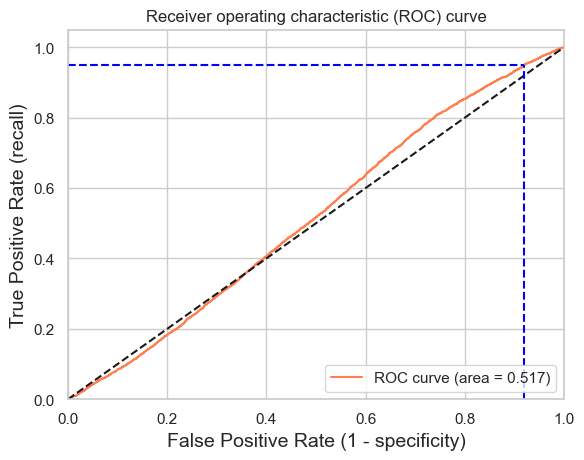

Using a threshold of 0.016 guarantees a sensitivity of 0.950 and a specificity of 0.080, i.e. a false positive rate of 92.03%.


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X = tr_final[Selected]
y = tr_final['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

## linear Regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
print(regressor.coef_)
print(regressor.intercept_)

[-3.18287977e-02  4.13478703e-02 -3.99849572e-02 -2.26127842e-02
 -1.68733843e-03 -5.41115934e-08 -3.03777757e-08  4.13072925e-07]
0.09471704723957147


In [16]:
regressor.score(X_test, y_test)

-0.0044307074953280345

### hasil dari LogisticRegression accuracy is 0.919 dan LinearRegression -0.0044307074953280345
